In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")
pd.set_option('display.max_columns', None)
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('Seasons_Stats.csv')

In [3]:
df.head(10)

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   
5           5  1950.0       Ed Bartels    F  24.0  NYK   2.0 NaN NaN  NaN   
6           6  1950.0      Ralph Beard    G  22.0  INO  60.0 NaN NaN  NaN   
7           7  1950.0       Gene Berce  G-F  23.0  TRI   3.0 NaN NaN  NaN   
8           8  1950.0    Charlie Black  F-C  28.0  TOT  65.0 NaN NaN  NaN   
9           9  1950.0    Charlie Black  F-C  28.0  FTW  36.0 NaN NaN  NaN   

     TS%  3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  blanl  \
0  0.368   NaN  0.467   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1  0.435   NaN  0.387   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2  0.394   NaN  0.259   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3  0.312   NaN  0.395   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4  0.308   NaN  0.378   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
5  0.376   NaN  0.750   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
6  0.422   NaN  0.301   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
7  0.275   NaN  0.313   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
8  0.346   NaN  0.395   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
9  0.362   NaN  0.480   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   OWS  DWS   WS  WS/48  blank2  OBPM  DBPM  BPM  VORP     FG    FGA    FG%  \
0 -0.1  3.6  3.5    NaN     NaN   NaN   NaN  NaN   NaN  144.0  516.0  0.279   
1  1.6  0.6  2.2    NaN     NaN   NaN   NaN  NaN   NaN  102.0  274.0  0.372   
2  0.9  2.8  3.6    NaN     NaN   NaN   NaN  NaN   NaN  174.0  499.0  0.349   
3 -0.5 -0.1 -0.6    NaN     NaN   NaN   NaN  NaN   NaN   22.0   86.0  0.256   
4 -0.5 -0.1 -0.6    NaN     NaN   NaN   NaN  NaN   NaN   21.0   82.0  0.256   
5  0.0  0.0  0.0    NaN     NaN   NaN   NaN  NaN   NaN    1.0    4.0  0.250   
6  3.6  1.2  4.8    NaN     NaN   NaN   NaN  NaN   NaN  340.0  936.0  0.363   
7 -0.1  0.0 -0.1    NaN     NaN   NaN   NaN  NaN   NaN    5.0   16.0  0.313   
8 -2.2  5.0  2.8    NaN     NaN   NaN   NaN  NaN   NaN  226.0  813.0  0.278   
9 -0.7  2.2  1.5    NaN     NaN   NaN   NaN  NaN   NaN  125.0  435.0  0.287   

   3P  3PA  3P%     2P    2PA    2P%   eFG%     FT    FTA    FT%  ORB  DRB  \
0 NaN  NaN  NaN  144.0  516.0  0.279  0.279  170.0  241.0  0.705  NaN  NaN   
1 NaN  NaN  NaN  102.0  274.0  0.372  0.372   75.0  106.0  0.708  NaN  NaN   
2 NaN  NaN  NaN  174.0  499.0  0.349  0.349   90.0  129.0  0.698  NaN  NaN   
3 NaN  NaN  NaN   22.0   86.0  0.256  0.256   19.0   34.0  0.559  NaN  NaN   
4 NaN  NaN  NaN   21.0   82.0  0.256  0.256   17.0   31.0  0.548  NaN  NaN   
5 NaN  NaN  NaN    1.0    4.0  0.250  0.250    2.0    3.0  0.667  NaN  NaN   
6 NaN  NaN  NaN  340.0  936.0  0.363  0.363  215.0  282.0  0.762  NaN  NaN   
7 NaN  NaN  NaN    5.0   16.0  0.313  0.313    0.0    5.0  0.000  NaN  NaN   
8 NaN  NaN  NaN  226.0  813.0  0.278  0.278  209.0  321.0  0.651  NaN  NaN   
9 NaN  NaN  NaN  125.0  435.0  0.287  0.287  132.0  209.0  0.632  NaN  NaN   

   TRB    AST  STL  BLK  TOV     PF    PTS  
0  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  NaN   20.0  NaN  NaN  NaN   27.0   59.0  
5  NaN    0.0  NaN  NaN  NaN    2.0    4.0  
6  NaN  233.0  NaN  NaN  NaN  132.0  895.0  
7  NaN    2.0  NaN  NaN  NaN    6.0   10.0  
8  NaN  163.0  NaN  NaN  NaN  273.0  661.0  
9  NaN   75.0  NaN  NaN  NaN  140.0  382.0

In [4]:
#sort players by name and year order ascending
player_data = df.sort_values(by=['Player', 'Year'])
player_data

Unnamed: 0    Year         Player  Pos   Age   Tm     G    GS      MP  \
8035         8035  1986.0     A.C. Green   PF  22.0  LAL  82.0   1.0  1542.0   
8420         8420  1987.0     A.C. Green   PF  23.0  LAL  79.0  72.0  2240.0   
8807         8807  1988.0     A.C. Green   PF  24.0  LAL  82.0  64.0  2636.0   
9242         9242  1989.0     A.C. Green   PF  25.0  LAL  82.0  82.0  2510.0   
9688         9688  1990.0     A.C. Green   PF  26.0  LAL  82.0  82.0  2709.0   
10166       10166  1991.0     A.C. Green   PF  27.0  LAL  82.0  21.0  2164.0   
10617       10617  1992.0     A.C. Green   PF  28.0  LAL  82.0  53.0  2902.0   
11060       11060  1993.0     A.C. Green   PF  29.0  LAL  82.0  55.0  2819.0   
11529       11529  1994.0     A.C. Green   PF  30.0  PHO  82.0  55.0  2825.0   
11999       11999  1995.0     A.C. Green   SF  31.0  PHO  82.0  52.0  2687.0   
12477       12477  1996.0     A.C. Green   SF  32.0  PHO  82.0  36.0  2113.0   
13034       13034  1997.0     A.C. Green   PF  33.0  TOT  83.0  73.0  2492.0   
13035       13035  1997.0     A.C. Green   PF  33.0  PHO  27.0  19.0   548.0   
13036       13036  1997.0     A.C. Green   PF  33.0  DAL  56.0  54.0  1944.0   
13600       13600  1998.0     A.C. Green   PF  34.0  DAL  82.0  68.0  2649.0   
14139       14139  1999.0     A.C. Green   PF  35.0  DAL  50.0  35.0   924.0   
14648       14648  2000.0     A.C. Green   PF  36.0  LAL  82.0  82.0  1929.0   
15148       15148  2001.0     A.C. Green   PF  37.0  MIA  82.0   1.0  1411.0   
14526       14526  2000.0  A.J. Bramlett    C  23.0  CLE   8.0   0.0    61.0   
10130       10130  1991.0   A.J. English   SG  23.0  WSB  70.0  12.0  1443.0   
10583       10583  1992.0   A.J. English   SG  24.0  WSB  81.0   6.0  1665.0   
15151       15151  2001.0    A.J. Guyton   PG  22.0  CHI  33.0   8.0   630.0   
15684       15684  2002.0    A.J. Guyton   PG  23.0  CHI  45.0   6.0   607.0   
16172       16172  2003.0    A.J. Guyton   PG  24.0  GSW   2.0   0.0     9.0   
24304       24304  2017.0   A.J. Hammons    C  24.0  DAL  22.0   0.0   163.0   
20357       20357  2010.0     A.J. Price   PG  23.0  IND  56.0   2.0   865.0   
20966       20966  2011.0     A.J. Price   PG  24.0  IND  50.0   0.0   795.0   
21529       21529  2012.0     A.J. Price   PG  25.0  IND  44.0   1.0   568.0   
22100       22100  2013.0     A.J. Price   PG  26.0  WAS  57.0  22.0  1278.0   
22709       22709  2014.0     A.J. Price   SG  27.0  MIN  28.0   0.0    99.0   
...           ...     ...            ...  ...   ...  ...   ...   ...     ...   
8680         8680     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
9107         9107     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
9546         9546     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
10006       10006     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
10448       10448     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
10907       10907     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
11357       11357     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
11839       11839     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
12292       12292     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
12838       12838     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
13413       13413     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
13961       13961     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
14469       14469     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
14966       14966     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
15504       15504     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
16005       16005     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
16489       16489     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
17075       17075     NaN            NaN  NaN   NaN  NaN   NaN   NaN     NaN   
17661  

In [5]:
#sort players by the first year they played
#get their age and Year that they were a rookie and create columns for those
rook = player_data.groupby(['Player']).head(1)
rook = rook[['Player', 'Year', 'Age']]
df_new_new = pd.merge(player_data, rook, on='Player')
df_new_new['Year']=df_new_new['Year_x']
df_new_new['rookie_age']=df_new_new['Age_y']
df_new_new['rookie_year']=df_new_new['Year_y']
df_new_new.drop(columns=['Age_y'], inplace=True)
df_new_new.drop(columns=['Year_y'], inplace=True)
df_new_new.drop(columns=['Year_x'], inplace=True)
#add 'sophmore_year' and '3rd_year'
df_new_new['sophomore_year']=df_new_new['rookie_year']+1
df_new_new['3rd_year']=df_new_new['sophomore_year']+1
df_new_new.drop(columns=['Age_x'], inplace=True)
df_new_new

Unnamed: 0         Player  Pos   Tm     G    GS      MP   PER    TS%  \
0            8035     A.C. Green   PF  LAL  82.0   1.0  1542.0  11.8  0.564   
1            8420     A.C. Green   PF  LAL  79.0  72.0  2240.0  15.7  0.599   
2            8807     A.C. Green   PF  LAL  82.0  64.0  2636.0  14.5  0.581   
3            9242     A.C. Green   PF  LAL  82.0  82.0  2510.0  17.8  0.594   
4            9688     A.C. Green   PF  LAL  82.0  82.0  2709.0  14.7  0.548   
5           10166     A.C. Green   PF  LAL  82.0  21.0  2164.0  13.8  0.556   
6           10617     A.C. Green   PF  LAL  82.0  53.0  2902.0  16.7  0.556   
7           11060     A.C. Green   PF  LAL  82.0  55.0  2819.0  16.3  0.603   
8           11529     A.C. Green   PF  PHO  82.0  55.0  2825.0  17.0  0.555   
9           11999     A.C. Green   SF  PHO  82.0  52.0  2687.0  14.2  0.596   
10          12477     A.C. Green   SF  PHO  82.0  36.0  2113.0  12.9  0.558   
11          13034     A.C. Green   PF  TOT  83.0  73.0  2492.0  12.4  0.523   
12          13035     A.C. Green   PF  PHO  27.0  19.0   548.0  11.6  0.513   
13          13036     A.C. Green   PF  DAL  56.0  54.0  1944.0  12.6  0.527   
14          13600     A.C. Green   PF  DAL  82.0  68.0  2649.0  12.8  0.496   
15          14139     A.C. Green   PF  DAL  50.0  35.0   924.0  12.5  0.441   
16          14648     A.C. Green   PF  LAL  82.0  82.0  1929.0  11.2  0.482   
17          15148     A.C. Green   PF  MIA  82.0   1.0  1411.0  11.2  0.492   
18          14526  A.J. Bramlett    C  CLE   8.0   0.0    61.0  -0.4  0.190   
19          10130   A.J. English   SG  WSB  70.0  12.0  1443.0  10.6  0.480   
20          10583   A.J. English   SG  WSB  81.0   6.0  1665.0  12.5  0.480   
21          15151    A.J. Guyton   PG  CHI  33.0   8.0   630.0  10.3  0.495   
22          15684    A.J. Guyton   PG  CHI  45.0   6.0   607.0  11.8  0.477   
23          16172    A.J. Guyton   PG  GSW   2.0   0.0     9.0  -9.0  0.000   
24          24304   A.J. Hammons    C  DAL  22.0   0.0   163.0   8.4  0.472   
25          20357     A.J. Price   PG  IND  56.0   2.0   865.0  14.0  0.530   
26          20966     A.J. Price   PG  IND  50.0   0.0   795.0  10.7  0.454   
27          21529     A.J. Price   PG  IND  44.0   1.0   568.0  11.5  0.454   
28          22100     A.J. Price   PG  WAS  57.0  22.0  1278.0  12.4  0.501   
29          22709     A.J. Price   SG  MIN  28.0   0.0    99.0   9.7  0.469   
...           ...            ...  ...  ...   ...   ...     ...   ...    ...   
24661        8680            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24662        9107            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24663        9546            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24664       10006            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24665       10448            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24666       10907            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24667       11357            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24668       11839            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24669       12292            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24670       12838            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24671       13413            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24672       13961            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24673       14469            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24674       14966            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24675       15504            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24676       16005            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24677       16489            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24678       17075            NaN  NaN  NaN   NaN   NaN     NaN   NaN    NaN   
24679       17661            NaN  NaN  NaN   NaN   NaN   

In [6]:
#creating new df for just players that were a rookie in 1979 and on (after the 3pt shot was created)
df_after_1979 = df_new_new[df_new_new['rookie_year']>1978]
df_79_00 = df_after_1979[df_after_1979['rookie_year']<2000]
df_79_00

Unnamed: 0              Player    Pos   Tm     G    GS      MP   PER  \
0            8035          A.C. Green     PF  LAL  82.0   1.0  1542.0  11.8   
1            8420          A.C. Green     PF  LAL  79.0  72.0  2240.0  15.7   
2            8807          A.C. Green     PF  LAL  82.0  64.0  2636.0  14.5   
3            9242          A.C. Green     PF  LAL  82.0  82.0  2510.0  17.8   
4            9688          A.C. Green     PF  LAL  82.0  82.0  2709.0  14.7   
5           10166          A.C. Green     PF  LAL  82.0  21.0  2164.0  13.8   
6           10617          A.C. Green     PF  LAL  82.0  53.0  2902.0  16.7   
7           11060          A.C. Green     PF  LAL  82.0  55.0  2819.0  16.3   
8           11529          A.C. Green     PF  PHO  82.0  55.0  2825.0  17.0   
9           11999          A.C. Green     SF  PHO  82.0  52.0  2687.0  14.2   
10          12477          A.C. Green     SF  PHO  82.0  36.0  2113.0  12.9   
11          13034          A.C. Green     PF  TOT  83.0  73.0  2492.0  12.4   
12          13035          A.C. Green     PF  PHO  27.0  19.0   548.0  11.6   
13          13036          A.C. Green     PF  DAL  56.0  54.0  1944.0  12.6   
14          13600          A.C. Green     PF  DAL  82.0  68.0  2649.0  12.8   
15          14139          A.C. Green     PF  DAL  50.0  35.0   924.0  12.5   
16          14648          A.C. Green     PF  LAL  82.0  82.0  1929.0  11.2   
17          15148          A.C. Green     PF  MIA  82.0   1.0  1411.0  11.2   
19          10130        A.J. English     SG  WSB  70.0  12.0  1443.0  10.6   
20          10583        A.J. English     SG  WSB  81.0   6.0  1665.0  12.5   
34          10446         A.J. Wynder     PG  BOS   6.0   0.0    39.0   7.6   
72          12107         Aaron McKie     SG  POR  45.0  20.0   827.0  13.3   
73          12596         Aaron McKie     SG  POR  81.0  73.0  2259.0  13.4   
74          13172         Aaron McKie     SG  TOT  83.0  11.0  1625.0  12.1   
75          13173         Aaron McKie     SG  POR  41.0   8.0   775.0   9.1   
76          13174         Aaron McKie     SG  DET  42.0   3.0   850.0  14.8   
77          13711         Aaron McKie  SG-SF  TOT  81.0  32.0  1813.0   8.6   
78          13712         Aaron McKie     SF  DET  24.0   1.0   472.0  10.1   
79          13713         Aaron McKie     SG  PHI  57.0  31.0  1341.0   8.1   
80          14258         Aaron McKie     SG  PHI  50.0   4.0   959.0  11.4   
...           ...                 ...    ...  ...   ...   ...     ...   ...   
24477       12104     Xavier McDaniel     SF  BOS  68.0  15.0  1430.0  12.8   
24478       13167     Xavier McDaniel     PF  NJN  62.0   5.0  1170.0  10.8   
24479       13705     Xavier McDaniel     SF  NJN  20.0   0.0   180.0   4.3   
24501       11928          Yinka Dare      C  NJN   1.0   0.0     3.0 -33.9   
24502       12394          Yinka Dare      C  NJN  58.0  23.0   626.0   6.1   
24503       12955          Yinka Dare      C  NJN  41.0   2.0   313.0   7.2   
24504       13529          Yinka Dare      C  NJN  10.0   0.0    60.0   4.5   
24512        8095         Yvon Joseph      C  NJN   1.0   0.0     5.0  12.8   
24549       12233           Zan Tabak      C  HOU  37.0   0.0   182.0  11.2   
24550       12765           Zan Tabak      C  TOR  67.0  18.0  1332.0  12.4   
24551       13345           Zan Tabak      C  TOR  13.0   4.0   218.0  12.5   
24552       13876           Zan Tabak      C  TOT  57.0  34.0   984.0   9.7   
24553       13877           Zan Tabak      C  TOR  39.0  29.0   752.0   9.9   
24554       13878           Zan Tabak      C  BOS  18.0   5.0   232.0   9.2   
24555       14905           Zan Tabak      C  IND  18.0   0.0   114.0  13.6   
24556       15448           Zan Tabak      C  IND  55.0  14.0   777.0  10.5   
24562        9846       Zarko Paspalj     SF  SAS  28.0   1.0   181.0   4.3   
24611       13635  Zydrunas Ilgauskas      C  CLE  82.0  81.0  2379.0  19.7   
24612       14176  Zydrunas Ilgauskas      C  CLE   5.0  

In [7]:
seasons = df_79_00.groupby('Player')['Year'].nunique().to_frame()
#create the data frame for seasons played

df_79_00 = pd.merge(df_79_00, seasons, on = 'Player')
#add the career length to the dataframe

df_79_00 = df_79_00.rename(columns = {'Year_x':'Year', 'Year_y':'career_length'})
#rename the columns after having merged the seasons and df_final dfs

df_79_00




Unnamed: 0              Player    Pos   Tm     G    GS      MP   PER  \
0            8035          A.C. Green     PF  LAL  82.0   1.0  1542.0  11.8   
1            8420          A.C. Green     PF  LAL  79.0  72.0  2240.0  15.7   
2            8807          A.C. Green     PF  LAL  82.0  64.0  2636.0  14.5   
3            9242          A.C. Green     PF  LAL  82.0  82.0  2510.0  17.8   
4            9688          A.C. Green     PF  LAL  82.0  82.0  2709.0  14.7   
5           10166          A.C. Green     PF  LAL  82.0  21.0  2164.0  13.8   
6           10617          A.C. Green     PF  LAL  82.0  53.0  2902.0  16.7   
7           11060          A.C. Green     PF  LAL  82.0  55.0  2819.0  16.3   
8           11529          A.C. Green     PF  PHO  82.0  55.0  2825.0  17.0   
9           11999          A.C. Green     SF  PHO  82.0  52.0  2687.0  14.2   
10          12477          A.C. Green     SF  PHO  82.0  36.0  2113.0  12.9   
11          13034          A.C. Green     PF  TOT  83.0  73.0  2492.0  12.4   
12          13035          A.C. Green     PF  PHO  27.0  19.0   548.0  11.6   
13          13036          A.C. Green     PF  DAL  56.0  54.0  1944.0  12.6   
14          13600          A.C. Green     PF  DAL  82.0  68.0  2649.0  12.8   
15          14139          A.C. Green     PF  DAL  50.0  35.0   924.0  12.5   
16          14648          A.C. Green     PF  LAL  82.0  82.0  1929.0  11.2   
17          15148          A.C. Green     PF  MIA  82.0   1.0  1411.0  11.2   
18          10130        A.J. English     SG  WSB  70.0  12.0  1443.0  10.6   
19          10583        A.J. English     SG  WSB  81.0   6.0  1665.0  12.5   
20          10446         A.J. Wynder     PG  BOS   6.0   0.0    39.0   7.6   
21          12107         Aaron McKie     SG  POR  45.0  20.0   827.0  13.3   
22          12596         Aaron McKie     SG  POR  81.0  73.0  2259.0  13.4   
23          13172         Aaron McKie     SG  TOT  83.0  11.0  1625.0  12.1   
24          13173         Aaron McKie     SG  POR  41.0   8.0   775.0   9.1   
25          13174         Aaron McKie     SG  DET  42.0   3.0   850.0  14.8   
26          13711         Aaron McKie  SG-SF  TOT  81.0  32.0  1813.0   8.6   
27          13712         Aaron McKie     SF  DET  24.0   1.0   472.0  10.1   
28          13713         Aaron McKie     SG  PHI  57.0  31.0  1341.0   8.1   
29          14258         Aaron McKie     SG  PHI  50.0   4.0   959.0  11.4   
...           ...                 ...    ...  ...   ...   ...     ...   ...   
10268       12104     Xavier McDaniel     SF  BOS  68.0  15.0  1430.0  12.8   
10269       13167     Xavier McDaniel     PF  NJN  62.0   5.0  1170.0  10.8   
10270       13705     Xavier McDaniel     SF  NJN  20.0   0.0   180.0   4.3   
10271       11928          Yinka Dare      C  NJN   1.0   0.0     3.0 -33.9   
10272       12394          Yinka Dare      C  NJN  58.0  23.0   626.0   6.1   
10273       12955          Yinka Dare      C  NJN  41.0   2.0   313.0   7.2   
10274       13529          Yinka Dare      C  NJN  10.0   0.0    60.0   4.5   
10275        8095         Yvon Joseph      C  NJN   1.0   0.0     5.0  12.8   
10276       12233           Zan Tabak      C  HOU  37.0   0.0   182.0  11.2   
10277       12765           Zan Tabak      C  TOR  67.0  18.0  1332.0  12.4   
10278       13345           Zan Tabak      C  TOR  13.0   4.0   218.0  12.5   
10279       13876           Zan Tabak      C  TOT  57.0  34.0   984.0   9.7   
10280       13877           Zan Tabak      C  TOR  39.0  29.0   752.0   9.9   
10281       13878           Zan Tabak      C  BOS  18.0   5.0   232.0   9.2   
10282       14905           Zan Tabak      C  IND  18.0   0.0   114.0  13.6   
10283       15448           Zan Tabak      C  IND  55.0  14.0   777.0  10.5   
10284        9846       Zarko Paspalj     SF  SAS  28.0   1.0   181.0   4.3   
10285       13635  Zydrunas Ilgauskas      C  CLE  82.0  81.0  2379.0  19.7   
10286       14176  Zydrunas Ilgauskas      C  CLE   5.0  

In [8]:
# dropping the PF column because PF will stand for Power Forward
df_79_00.drop(columns=['PF'], inplace=True)

In [9]:
dum = pd.get_dummies(df_79_00['Pos']) 
#CREATE DUMMY DATA SET OF PLAYER POSITIONS
combo_cols = ['C-PF', 'PF-C', 'PF-SF', 'PG-SG', 'PG-SF', 'SF-PF', 'SF-SG', 'SG-PG', 'SG-SF']
#CREATE COLUMNS TO DELETE
#NOW ADD ALL COLUMN VALUES PER POSITION
dum['C'] = dum['C'] + dum['C-PF'] + dum['PF-C'] # DONE 3 COLUMNS
dum['PF'] = dum['PF'] + dum['C-PF'] + dum['PF-C'] + dum['PF-SF'] + dum['SF-PF'] #DONE 5 COLUMNS
dum['SF'] = dum['SF'] + dum['PF-SF'] + dum['SF-PF'] + dum['SF-SG'] + dum['SG-SF'] + dum['PG-SF'] #DONE 6 COLUMNS
dum['SG'] = dum['SG'] + dum['PG-SG'] + dum['SF-SG'] + dum['SG-PG'] + dum['SG-SF'] #DONE 5 COLUMNS
dum['PG'] = dum['PG'] + dum['PG-SG'] + dum['SG-PG'] + dum['PG-SF'] #4 COLUMNS
dum.drop(columns = combo_cols, inplace = True) # DROP THE COMBO COLUMNS
dum

C  PF  PG  SF  SG
0      0   1   0   0   0
1      0   1   0   0   0
2      0   1   0   0   0
3      0   1   0   0   0
4      0   1   0   0   0
5      0   1   0   0   0
6      0   1   0   0   0
7      0   1   0   0   0
8      0   1   0   0   0
9      0   0   0   1   0
10     0   0   0   1   0
11     0   1   0   0   0
12     0   1   0   0   0
13     0   1   0   0   0
14     0   1   0   0   0
15     0   1   0   0   0
16     0   1   0   0   0
17     0   1   0   0   0
18     0   0   0   0   1
19     0   0   0   0   1
20     0   0   1   0   0
21     0   0   0   0   1
22     0   0   0   0   1
23     0   0   0   0   1
24     0   0   0   0   1
25     0   0   0   0   1
26     0   0   0   1   1
27     0   0   0   1   0
28     0   0   0   0   1
29     0   0   0   0   1
...   ..  ..  ..  ..  ..
10268  0   0   0   1   0
10269  0   1   0   0   0
10270  0   0   0   1   0
10271  1   0   0   0   0
10272  1   0   0   0   0
10273  1   0   0   0   0
10274  1   0   0   0   0
10275  1   0   0   0   0
10276  1   0   0   0   0
10277  1   0   0   0   0
10278  1   0   0   0   0
10279  1   0   0   0   0
10280  1   0   0   0   0
10281  1   0   0   0   0
10282  1   0   0   0   0
10283  1   0   0   0   0
10284  0   0   0   1   0
10285  1   0   0   0   0
10286  1   0   0   0   0
10287  1   0   0   0   0
10288  1   0   0   0   0
10289  1   0   0   0   0
10290  1   0   0   0   0
10291  1   0   0   0   0
10292  1   0   0   0   0
10293  1   0   0   0   0
10294  1   0   0   0   0
10295  1   0   0   0   0
10296  1   0   0   0   0
10297  1   0   0   0   0

[10298 rows x 5 columns]

In [10]:
#add the position variables to the dataframe
df_79_00['PG'] = dum['PG']
df_79_00['SG'] = dum['SG']
df_79_00['SF'] = dum['SF']
df_79_00['PF'] = dum['PF']
df_79_00['C'] = dum['C']


df_79_00

Unnamed: 0              Player    Pos   Tm     G    GS      MP   PER  \
0            8035          A.C. Green     PF  LAL  82.0   1.0  1542.0  11.8   
1            8420          A.C. Green     PF  LAL  79.0  72.0  2240.0  15.7   
2            8807          A.C. Green     PF  LAL  82.0  64.0  2636.0  14.5   
3            9242          A.C. Green     PF  LAL  82.0  82.0  2510.0  17.8   
4            9688          A.C. Green     PF  LAL  82.0  82.0  2709.0  14.7   
5           10166          A.C. Green     PF  LAL  82.0  21.0  2164.0  13.8   
6           10617          A.C. Green     PF  LAL  82.0  53.0  2902.0  16.7   
7           11060          A.C. Green     PF  LAL  82.0  55.0  2819.0  16.3   
8           11529          A.C. Green     PF  PHO  82.0  55.0  2825.0  17.0   
9           11999          A.C. Green     SF  PHO  82.0  52.0  2687.0  14.2   
10          12477          A.C. Green     SF  PHO  82.0  36.0  2113.0  12.9   
11          13034          A.C. Green     PF  TOT  83.0  73.0  2492.0  12.4   
12          13035          A.C. Green     PF  PHO  27.0  19.0   548.0  11.6   
13          13036          A.C. Green     PF  DAL  56.0  54.0  1944.0  12.6   
14          13600          A.C. Green     PF  DAL  82.0  68.0  2649.0  12.8   
15          14139          A.C. Green     PF  DAL  50.0  35.0   924.0  12.5   
16          14648          A.C. Green     PF  LAL  82.0  82.0  1929.0  11.2   
17          15148          A.C. Green     PF  MIA  82.0   1.0  1411.0  11.2   
18          10130        A.J. English     SG  WSB  70.0  12.0  1443.0  10.6   
19          10583        A.J. English     SG  WSB  81.0   6.0  1665.0  12.5   
20          10446         A.J. Wynder     PG  BOS   6.0   0.0    39.0   7.6   
21          12107         Aaron McKie     SG  POR  45.0  20.0   827.0  13.3   
22          12596         Aaron McKie     SG  POR  81.0  73.0  2259.0  13.4   
23          13172         Aaron McKie     SG  TOT  83.0  11.0  1625.0  12.1   
24          13173         Aaron McKie     SG  POR  41.0   8.0   775.0   9.1   
25          13174         Aaron McKie     SG  DET  42.0   3.0   850.0  14.8   
26          13711         Aaron McKie  SG-SF  TOT  81.0  32.0  1813.0   8.6   
27          13712         Aaron McKie     SF  DET  24.0   1.0   472.0  10.1   
28          13713         Aaron McKie     SG  PHI  57.0  31.0  1341.0   8.1   
29          14258         Aaron McKie     SG  PHI  50.0   4.0   959.0  11.4   
...           ...                 ...    ...  ...   ...   ...     ...   ...   
10268       12104     Xavier McDaniel     SF  BOS  68.0  15.0  1430.0  12.8   
10269       13167     Xavier McDaniel     PF  NJN  62.0   5.0  1170.0  10.8   
10270       13705     Xavier McDaniel     SF  NJN  20.0   0.0   180.0   4.3   
10271       11928          Yinka Dare      C  NJN   1.0   0.0     3.0 -33.9   
10272       12394          Yinka Dare      C  NJN  58.0  23.0   626.0   6.1   
10273       12955          Yinka Dare      C  NJN  41.0   2.0   313.0   7.2   
10274       13529          Yinka Dare      C  NJN  10.0   0.0    60.0   4.5   
10275        8095         Yvon Joseph      C  NJN   1.0   0.0     5.0  12.8   
10276       12233           Zan Tabak      C  HOU  37.0   0.0   182.0  11.2   
10277       12765           Zan Tabak      C  TOR  67.0  18.0  1332.0  12.4   
10278       13345           Zan Tabak      C  TOR  13.0   4.0   218.0  12.5   
10279       13876           Zan Tabak      C  TOT  57.0  34.0   984.0   9.7   
10280       13877           Zan Tabak      C  TOR  39.0  29.0   752.0   9.9   
10281       13878           Zan Tabak      C  BOS  18.0   5.0   232.0   9.2   
10282       14905           Zan Tabak      C  IND  18.0   0.0   114.0  13.6   
10283       15448           Zan Tabak      C  IND  55.0  14.0   777.0  10.5   
10284        9846       Zarko Paspalj     SF  SAS  28.0   1.0   181.0   4.3   
10285       13635  Zydrunas Ilgauskas      C  CLE  82.0  81.0  2379.0  19.7   
10286       14176  Zydrunas Ilgauskas      C  CLE   5.0  

In [11]:
#dropping columns that won't be used or will be re-calculated later - position is now 5 categorical columns
df_79_00.drop(columns=['TS%', '3PAr', 'FTr', 'FG%', '3P%', 'FT%', 'eFG%', '2P%', 'Unnamed: 0', 'Tm', 'Pos', 'blanl', 'WS/48', 'blank2'], inplace=True)
df_79_00

Player     G    GS      MP   PER  ORB%  DRB%  TRB%  AST%  \
0              A.C. Green  82.0   1.0  1542.0  11.8  12.4  15.5  14.0   4.2   
1              A.C. Green  79.0  72.0  2240.0  15.7  11.2  18.8  15.3   4.6   
2              A.C. Green  82.0  64.0  2636.0  14.5  11.1  19.1  15.3   4.5   
3              A.C. Green  82.0  82.0  2510.0  17.8  12.3  20.0  16.4   5.5   
4              A.C. Green  82.0  82.0  2709.0  14.7  11.5  18.4  15.1   4.6   
5              A.C. Green  82.0  21.0  2164.0  13.8  11.3  16.2  13.8   4.5   
6              A.C. Green  82.0  53.0  2902.0  16.7  11.8  18.2  14.9   6.0   
7              A.C. Green  82.0  55.0  2819.0  16.3  11.5  17.3  14.4   5.9   
8              A.C. Green  82.0  55.0  2825.0  17.0  11.1  18.8  15.0   6.9   
9              A.C. Green  82.0  52.0  2687.0  14.2   8.3  20.4  14.3   6.5   
10             A.C. Green  82.0  36.0  2113.0  12.9   9.2  20.9  15.2   4.9   
11             A.C. Green  83.0  73.0  2492.0  12.4  10.2  20.5  15.3   4.4   
12             A.C. Green  27.0  19.0   548.0  11.6   7.1  22.2  14.7   4.6   
13             A.C. Green  56.0  54.0  1944.0  12.6  11.1  20.0  15.5   4.3   
14             A.C. Green  82.0  68.0  2649.0  12.8   9.0  19.3  14.0   7.3   
15             A.C. Green  50.0  35.0   924.0  12.5   9.9  17.8  13.9   4.5   
16             A.C. Green  82.0  82.0  1929.0  11.2   9.0  17.9  13.5   5.9   
17             A.C. Green  82.0   1.0  1411.0  11.2   9.0  17.3  13.2   4.8   
18           A.J. English  70.0  12.0  1443.0  10.6   5.0   6.2   5.6  18.0   
19           A.J. English  81.0   6.0  1665.0  12.5   4.8   6.3   5.5  13.7   
20            A.J. Wynder   6.0   0.0    39.0   7.6   3.1   5.2   4.2  24.0   
21            Aaron McKie  45.0  20.0   827.0  13.3   4.6  13.5   8.8  15.9   
22            Aaron McKie  81.0  73.0  2259.0  13.4   4.4  10.9   7.7  14.6   
23            Aaron McKie  83.0  11.0  1625.0  12.1   3.1  13.2   8.3  15.4   
24            Aaron McKie  41.0   8.0   775.0   9.1   2.0  11.9   7.1  15.8   
25            Aaron McKie  42.0   3.0   850.0  14.8   4.0  14.5   9.4  15.1   
26            Aaron McKie  81.0  32.0  1813.0   8.6   3.7  11.2   7.4  15.0   
27            Aaron McKie  24.0   1.0   472.0  10.1   6.0  11.2   8.6  12.9   
28            Aaron McKie  57.0  31.0  1341.0   8.1   2.9  11.1   7.0  15.8   
29            Aaron McKie  50.0   4.0   959.0  11.4   3.2  14.0   8.5  17.9   
...                   ...   ...   ...     ...   ...   ...   ...   ...   ...   
10268     Xavier McDaniel  68.0  15.0  1430.0  12.8   7.5  16.9  12.1  12.0   
10269     Xavier McDaniel  62.0   5.0  1170.0  10.8  10.8  19.1  14.7   8.7   
10270     Xavier McDaniel  20.0   0.0   180.0   4.3   7.2  13.1  10.0   7.0   
10271          Yinka Dare   1.0   0.0     3.0 -33.9   0.0  36.6  18.2   0.0   
10272          Yinka Dare  58.0  23.0   626.0   6.1   9.6  22.5  15.9   0.0   
10273          Yinka Dare  41.0   2.0   313.0   7.2  11.4  17.3  14.2   1.4   
10274          Yinka Dare  10.0   0.0    60.0   4.5  18.1  14.4  16.4   2.4   
10275         Yvon Joseph   1.0   0.0     5.0  12.8   0.0   0.0   0.0   0.0   
10276           Zan Tabak  37.0   0.0   182.0  11.2  15.3  20.4  18.0   3.3   
10277           Zan Tabak  67.0  18.0  1332.0  12.4  10.4  18.3  14.3   7.6   
10278           Zan Tabak  13.0   4.0   218.0  12.5  10.4  16.1  13.2  11.0   
10279           Zan Tabak  57.0  34.0   984.0   9.7   9.2  15.6  12.2   8.1   
10280           Zan Tabak  39.0  29.0   752.0   9.9   8.5  14.7  11.5   8.1   
10281           Zan Tabak  18.0   5.0   232.0   9.2  11.7  18.3  14.7   7.9   
10282           Zan Tabak  18.0   0.0   114.0  13.6  16.4  15.2  15.7   5.6   
10283           Zan Tabak  55.0  14.0   777.0  10.5   9.8  20.9  15.5   7.3   
10284       Zarko Paspalj  28.0   1.0   181.0   4.3   9.6   9.1   9.3   7.8   
10285  Zydrunas Ilgauskas  82.0  81.0  2379.0  19.7  14.6  22.6  18.6   5.7   
10286  Zydrunas Ilgauskas   5.0   5.0   171.0  17.5  12.8  20.0  16.4

In [12]:
#create separate dataframes for rookies, sophmores, and 3rd year players
rookie_df = df_79_00[df_79_00['Year']==df_79_00['rookie_year']]
sophomore_df = df_79_00[df_79_00['Year']==df_79_00['sophomore_year']]
third_year_df = df_79_00[df_79_00['Year']==df_79_00['3rd_year']]

In [13]:
#create separate df's for traded players and when they were traded
traded_1 = rookie_df[rookie_df.Player.groupby(rookie_df.Player).transform('value_counts')>1]
traded_2 = sophomore_df[sophomore_df.Player.groupby(sophomore_df.Player).transform('value_counts')>1]
traded_3 = third_year_df[third_year_df.Player.groupby(third_year_df.Player).transform('value_counts')>1]

In [14]:
# Define a lambda function to compute the weighted mean weighting by MP:
wmMP1 = lambda x: np.average(x, weights=traded_1.loc[x.index, 'MP'])
wmMP2 = lambda x: np.average(x, weights=traded_2.loc[x.index, 'MP'])
wmMP3 = lambda x: np.average(x, weights=traded_3.loc[x.index, 'MP'])


# create dictionaries for each traded player df with the functions to apply to specific columns:
f1 = {'G': ['sum'], 'GS': ['sum'], 'MP': ['sum'], 'PER': wmMP1, 'ORB%': wmMP1, 'DRB%': wmMP1, 'TRB%': wmMP1, 'AST%': wmMP1, 'STL%': wmMP1, 'STL%': wmMP1, 'BLK%': wmMP1, 'TOV%': wmMP1, 'USG%': wmMP1, 'TRB%': wmMP1, 'OWS': wmMP1, 'DWS': wmMP1, 'WS': wmMP1, 'OBPM': wmMP1, 'DBPM': wmMP1, 'BPM': wmMP1, 'VORP': wmMP1, 'FG': ['sum'], 'FGA': ['sum'], '3P': ['sum'], '3PA': ['sum'], '2P': ['sum'], '2PA': ['sum'], 'FT': ['sum'], 'FTA': ['sum'], 'ORB': ['sum'], 'DRB': ['sum'], 'TRB': ['sum'], 'AST': ['sum'], 'STL': ['sum'], 'BLK': ['sum'], 'TOV': ['sum'], 'PF': ['sum'], 'PTS': ['sum'], 'Year': ['mean'], 'rookie_age': ['mean'], 'rookie_year': ['mean'], 'sophomore_year': ['mean'], '3rd_year': ['mean'], 'career_length': ['mean'], 'C': ['mean'], 'PF': ['mean'], 'SF': ['mean'], 'SG': ['mean'], 'PG': ['mean'] }
f2 = {'G': ['sum'], 'GS': ['sum'], 'MP': ['sum'], 'PER': wmMP2, 'ORB%': wmMP2, 'DRB%': wmMP2, 'TRB%': wmMP2, 'AST%': wmMP2, 'STL%': wmMP2, 'STL%': wmMP2, 'BLK%': wmMP2, 'TOV%': wmMP2, 'USG%': wmMP2, 'TRB%': wmMP2, 'OWS': wmMP2, 'DWS': wmMP2, 'WS': wmMP2, 'OBPM': wmMP2, 'DBPM': wmMP2, 'BPM': wmMP2, 'VORP': wmMP2, 'FG': ['sum'], 'FGA': ['sum'], '3P': ['sum'], '3PA': ['sum'], '2P': ['sum'], '2PA': ['sum'], 'FT': ['sum'], 'FTA': ['sum'], 'ORB': ['sum'], 'DRB': ['sum'], 'TRB': ['sum'], 'AST': ['sum'], 'STL': ['sum'], 'BLK': ['sum'], 'TOV': ['sum'], 'PF': ['sum'], 'PTS': ['sum'], 'Year': ['mean'], 'rookie_age': ['mean'], 'rookie_year': ['mean'], 'sophomore_year': ['mean'], '3rd_year': ['mean'], 'career_length': ['mean'], 'C': ['mean'], 'PF': ['mean'], 'SF': ['mean'], 'SG': ['mean'], 'PG': ['mean'] }
f3 = {'G': ['sum'], 'GS': ['sum'], 'MP': ['sum'], 'PER': wmMP3, 'ORB%': wmMP3, 'DRB%': wmMP3, 'TRB%': wmMP3, 'AST%': wmMP3, 'STL%': wmMP3, 'STL%': wmMP3, 'BLK%': wmMP3, 'TOV%': wmMP3, 'USG%': wmMP3, 'TRB%': wmMP3, 'OWS': wmMP3, 'DWS': wmMP3, 'WS': wmMP3, 'OBPM': wmMP3, 'DBPM': wmMP3, 'BPM': wmMP3, 'VORP': wmMP3, 'FG': ['sum'], 'FGA': ['sum'], '3P': ['sum'], '3PA': ['sum'], '2P': ['sum'], '2PA': ['sum'], 'FT': ['sum'], 'FTA': ['sum'], 'ORB': ['sum'], 'DRB': ['sum'], 'TRB': ['sum'], 'AST': ['sum'], 'STL': ['sum'], 'BLK': ['sum'], 'TOV': ['sum'], 'PF': ['sum'], 'PTS': ['sum'], 'Year': ['mean'], 'rookie_age': ['mean'], 'rookie_year': ['mean'], 'sophomore_year': ['mean'], '3rd_year': ['mean'], 'career_length': ['mean'], 'C': ['mean'], 'PF': ['mean'], 'SF': ['mean'], 'SG': ['mean'], 'PG': ['mean'] }
# Groupby and aggregate with dictionary for each years traded players:
rookies_traded = traded_1.groupby('Player').agg(f1)

sophomores_traded = traded_2.groupby('Player').agg(f2)

year_3_traded = traded_3.groupby('Player').agg(f3)

In [15]:
#drop duplicates so that traded players are gone
rookie_df.drop_duplicates(subset=['Player'], keep=False, inplace=True)
sophomore_df.drop_duplicates(subset=['Player'], keep=False, inplace=True)
third_year_df.drop_duplicates(subset=['Player'], keep=False, inplace=True)

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.pa

In [16]:
#creating categorical variable 'Traded' to show if a player has been traded
rookie_df['Traded'] = 0
sophomore_df['Traded'] = 0
third_year_df['Traded'] = 0
rookies_traded['Traded'] = 1
sophomores_traded['Traded'] = 1
year_3_traded['Traded'] = 1

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [17]:
#getting rid of the sum and lamdba level for the columns
rookies_traded.columns = rookies_traded.columns.droplevel(1)
sophomores_traded.columns = sophomores_traded.columns.droplevel(1)
year_3_traded.columns = year_3_traded.columns.droplevel(1)

In [18]:
#re-setting the index to player so that it will be the same as the traded players dfs
rookie_df.set_index('Player', inplace=True)
sophomore_df.set_index('Player', inplace=True)
third_year_df.set_index('Player', inplace=True)

In [19]:
#creating a list of what I want to make the final data frames for rookies, sophomores, and third years
rook_dfs = [rookie_df, rookies_traded]
soph_dfs = [sophomore_df, sophomores_traded]
third_dfs = [third_year_df, year_3_traded]

allrookies_df = pd.concat(rook_dfs)
allsophomores_df = pd.concat(soph_dfs)
ally3s_df = pd.concat(third_dfs)

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys
/Users/hmnathel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence

In [20]:
#adding back some of the variables (stats that can be calculated using what we have)
#created functions that will calculated them for each player in the df

def TSp(df): # TS%
    return round(df['PTS'] / (2*(df['FGA'] + 0.44*df['FTA'])), 3)

def FGp(df): # field goal percentage
    return round(df['FG'] / df['FGA'], 3)

def three_point_percent(df): #3P%
    return round(df['3P'] / df['3PA'], 3)

def FTp(df): # free throw percentage
    return round(df['FT'] / df['FTA'], 3)

def three_point_rate(df): # 3PAr
    return round(df['3PA'] / df['FGA'] ,3)

def FTr(df): # free throw rate
    return round(df['FTA'] / df['FGA'], 3)


In [21]:
allrookies_df['TS%'] = TSp(allrookies_df)
allsophomores_df['TS%'] = TSp(allsophomores_df)
ally3s_df['TS%'] = TSp(ally3s_df)

allrookies_df['FG%'] = FGp(allrookies_df)
allsophomores_df['FG%'] = FGp(allsophomores_df)
ally3s_df['FG%'] = FGp(ally3s_df)

allrookies_df['3P%'] = three_point_percent(allrookies_df)
allsophomores_df['3P%'] = three_point_percent(allsophomores_df)
ally3s_df['3P%'] = three_point_percent(ally3s_df)

allrookies_df['FT%'] = FTp(allrookies_df)
allsophomores_df['FT%'] = FTp(allsophomores_df)
ally3s_df['FT%'] = FTp(ally3s_df)

allrookies_df['3PAr'] = three_point_rate(allrookies_df)
allsophomores_df['3PAr'] = three_point_rate(allsophomores_df)
ally3s_df['3PAr'] = three_point_rate(ally3s_df)

allrookies_df['FTr'] = FTr(allrookies_df)
allsophomores_df['FTr'] = FTr(allsophomores_df)
ally3s_df['FTr'] = FTr(ally3s_df)

In [22]:
#dropping more unnecessary variables
allrookies_df.drop(columns=['Year', 'sophomore_year', '3rd_year'], inplace=True)
allsophomores_df.drop(columns=['Year', 'sophomore_year', '3rd_year'], inplace=True)
ally3s_df.drop(columns=['Year', 'sophomore_year', '3rd_year'], inplace=True)

In [23]:
allrookies_df

2P     2PA     3P    3PA    AST       AST%    BLK  \
Player                                                                        
A.C. Green             208.0   382.0    1.0    6.0   54.0   4.200000   49.0   
A.J. English           248.0   541.0    3.0   31.0  177.0  18.000000   15.0   
A.J. Wynder              3.0    11.0    0.0    1.0    8.0  24.000000    0.0   
Aaron McKie            105.0   233.0   11.0   28.0   89.0  15.900000   16.0   
Aaron Swinson           10.0    18.0    0.0    0.0    3.0   9.000000    0.0   
Aaron Williams           2.0     8.0    0.0    0.0    1.0  13.000000    0.0   
Abdul Jeelani          288.0   559.0    0.0    6.0   95.0  11.600000   40.0   
Acie Earl              151.0   371.0    0.0    1.0   12.0   1.500000   53.0   
Adam Keefe             188.0   375.0    0.0    1.0   80.0   7.000000   16.0   
Adonal Foyle            69.0   169.0    0.0    1.0   14.0   3.500000   52.0   
Adonis Jordan            3.0    13.0    3.0   10.0   19.0  33.300000    1.0   
Adrian Branch           48.0    94.0    0.0    2.0   16.0  10.000000    3.0   
Adrian Caldwell         42.0    76.0    0.0    0.0    7.0   2.800000   18.0   
Al Harrington           18.0    51.0    0.0    5.0    5.0   5.200000    2.0   
Alaa Abdelnaby          55.0   116.0    0.0    0.0   12.0   5.800000   12.0   
Alan Hardy              22.0    59.0    0.0    0.0    3.0   3.600000    9.0   
Alan Henderson         192.0   431.0    0.0    3.0   51.0   5.800000   43.0   
Alan Ogg                24.0    53.0    0.0    2.0    2.0   1.000000   27.0   
Albert King            388.0   799.0    3.0   13.0  142.0  12.800000   36.0   
Alec Kessler           199.0   464.0    0.0    4.0   31.0   3.700000   26.0   
Aleksandar Djordjevic    3.0     9.0    5.0    7.0    5.0  13.100000    0.0   
Alex Blackwell          14.0    39.0    0.0    3.0    7.0   9.100000    2.0   
Alex Bradley            54.0   102.0    0.0    1.0   11.0   4.600000    5.0   
Alex Stivrins            1.0     4.0    0.0    0.0    1.0   9.300000    0.0   
Alexander Volkov       124.0   250.0   13.0   34.0   83.0  12.300000   22.0   
Alfredrick Hughes      149.0   355.0    3.0   17.0   61.0   9.600000    5.0   
Allan Houston          237.0   554.0   35.0  117.0  100.0  10.500000   13.0   
Allen Iverson*         470.0  1049.0  155.0  455.0  567.0  33.600000   24.0   
Allen Leavell          327.0   637.0    3.0   19.0  417.0  26.300000   28.0   
Alonzo Mourning*       572.0  1116.0    0.0    3.0   76.0   4.300000  271.0   
...                      ...     ...    ...    ...    ...        ...    ...   
Nate Johnston           34.0    88.0    2.0    8.0    2.0   1.608046   16.0   
Ollie Mack             196.0   388.0    0.0   10.0  106.0  10.416960    6.0   
Otis Howard             48.0   112.0    0.0    0.0   10.0   6.000000    4.0   
Paul Grant               4.0    12.0    0.0    0.0    0.0   0.000000    0.0   
Perry Moss             218.0   520.0   14.0   64.0  216.0  14.387154   30.0   
Perry Young             12.0    42.0    0.0    0.0   14.0  11.491667    2.0   
Ray Tolbert            200.0   400.0    0.0    4.0   66.0   7.565239   32.0   
Rick Robey             644.0  1346.0    0.0    0.0  264.0  10.486869   30.0   
Ricky Wilson            66.0   168.0   20.0   52.0  138.0  20.005238    6.0   
Ron Crevier              0.0     6.0    0.0    0.0    0.0   0.000000    0.0   
Ron Moore               18.0    58.0    0.0    0.0    2.0   2.386441    0.0   
Ruben Nembhard          32.0    62.0    0.0   12.0   34.0  24.188053    0.0   
Russ Schoene           412.0   862.0    2.0    8.0  118.0   6.412766   46.0   
Scott Hastings          26.0    70.0    0.0    6.0    6.0   2.915000    2.0   
Sedric Toney            50.0   112.0    6.0   20.0   52.0  14.833913    0.0   
Shelton Jones          186.0   416.0    0.0    2.0   84.0   8.226026   30.0   
Sleepy Floyd           432.0  1004.0   20.0   50.0  276.0  15.306250   34.0   
Stephen Thompson        28.0    72.0    0.0    2.0   16.0  12.904396    6.0 

In [24]:
#merging rookie and sophomore year df's
df_first2 = pd.merge(left=allrookies_df, right=allsophomores_df, left_on='Player', right_on='Player', how='inner', suffixes=('_y1', '_y2'))
df_first2

2P_y1  2PA_y1  3P_y1  3PA_y1  AST_y1    AST%_y1  BLK_y1  \
Player                                                                        
A.C. Green          208.0   382.0    1.0     6.0    54.0   4.200000    49.0   
A.J. English        248.0   541.0    3.0    31.0   177.0  18.000000    15.0   
Aaron McKie         105.0   233.0   11.0    28.0    89.0  15.900000    16.0   
Aaron Williams        2.0     8.0    0.0     0.0     1.0  13.000000     0.0   
Abdul Jeelani       288.0   559.0    0.0     6.0    95.0  11.600000    40.0   
Acie Earl           151.0   371.0    0.0     1.0    12.0   1.500000    53.0   
Adam Keefe          188.0   375.0    0.0     1.0    80.0   7.000000    16.0   
Adonal Foyle         69.0   169.0    0.0     1.0    14.0   3.500000    52.0   
Adrian Branch        48.0    94.0    0.0     2.0    16.0  10.000000     3.0   
Adrian Caldwell      42.0    76.0    0.0     0.0     7.0   2.800000    18.0   
Al Harrington        18.0    51.0    0.0     5.0     5.0   5.200000     2.0   
Alaa Abdelnaby       55.0   116.0    0.0     0.0    12.0   5.800000    12.0   
Alan Hardy           22.0    59.0    0.0     0.0     3.0   3.600000     9.0   
Alan Henderson      192.0   431.0    0.0     3.0    51.0   5.800000    43.0   
Alan Ogg             24.0    53.0    0.0     2.0     2.0   1.000000    27.0   
Albert King         388.0   799.0    3.0    13.0   142.0  12.800000    36.0   
Alec Kessler        199.0   464.0    0.0     4.0    31.0   3.700000    26.0   
Allan Houston       237.0   554.0   35.0   117.0   100.0  10.500000    13.0   
Allen Iverson*      470.0  1049.0  155.0   455.0   567.0  33.600000    24.0   
Allen Leavell       327.0   637.0    3.0    19.0   417.0  26.300000    28.0   
Alonzo Mourning*    572.0  1116.0    0.0     3.0    76.0   4.300000   271.0   
Alphonso Ford         6.0    12.0    1.0     1.0     1.0  15.300000     0.0   
Alton Lister        149.0   287.0    0.0     0.0    84.0   9.200000   118.0   
Alvin Robertson     295.0   589.0    4.0    11.0   275.0  21.500000    24.0   
Andrae Patterson     43.0    92.0    0.0     5.0    15.0   8.600000     7.0   
Andre Turner          2.0     4.0    0.0     1.0     1.0   6.900000     0.0   
Andres Guibert        6.0    20.0    0.0     0.0     2.0  10.500000     1.0   
Andrew DeClercq      24.0    49.0    0.0     1.0     9.0   6.800000     5.0   
Andrew Lang          60.0   117.0    0.0     0.0     9.0   2.000000    48.0   
Andrew Toney        390.0   777.0    9.0    29.0   273.0  22.400000    10.0   
...                   ...     ...    ...     ...     ...        ...     ...   
J.J. Anderson       380.0   750.0    0.0     8.0   134.0   7.600166    42.0   
Jamie Feick         102.0   286.0   10.0    28.0    52.0   6.596314    28.0   
Jim Rowinski          2.0     8.0    0.0     0.0     0.0   0.000000     0.0   
Joe Courtney         26.0    64.0    0.0     0.0     6.0   3.866346    10.0   
John Thomas         110.0   226.0    0.0     0.0    34.0   4.869065    24.0   
Kelvin Upshaw       192.0   394.0    6.0    30.0   234.0  26.511507     6.0   
Kenny Green         166.0   382.0    0.0     2.0    18.0   2.909713    18.0   
Kevin Duckworth     260.0   544.0    0.0     2.0    58.0   4.331257    42.0   
Kevin Johnson       540.0  1144.0   10.0    48.0   874.0  31.384768    48.0   
Kevin Ollie          74.0   194.0    0.0     2.0   130.0  24.278605     0.0   
Larry Robinson      124.0   298.0    0.0     2.0    70.0  11.420000     2.0   
Lorenzo Williams     34.0    72.0    0.0     0.0    10.0   3.613687    34.0   
Mario Elie          150.0   298.0    8.0    20.0    90.0   9.017391    20.0   
Mark Randall        130.0   266.0    6.0    32.0    66.0  10.523469     6.0   
Marlon Redmond      326.0   774.0    0.0     0.0   116.0  10.465152    32.0   
Martin Muursepp     100.0   214.0    8.0    48.0    40.0  10.400000    22.0   
Marty Byrnes        374.0   778.0    0.0     0.0   208.0  10.417722    20.0   
Mike Higgins          6.0    16.0    0.0     0.0     6.0   7.020000   

In [25]:
#adding _y3 to the column names for 3rd year df
ally3s_df.columns = [str(col) + '_y3' for col in ally3s_df.columns]
ally3s_df

2P_y3  2PA_y3  3P_y3  3PA_y3  AST_y3    AST%_y3  BLK_y3  \
Player                                                                       
A.C. Green         322.0   638.0    0.0     2.0    93.0   4.500000    45.0   
Acie Earl          117.0   273.0    0.0     3.0    27.0   6.900000    37.0   
Adam Keefe         172.0   298.0    0.0     0.0    30.0   3.500000    25.0   
Adonal Foyle       193.0   380.0    0.0     0.0    42.0   4.000000   136.0   
Adrian Branch      195.0   405.0    7.0    31.0    60.0  10.800000     3.0   
Al Harrington      240.0   536.0    1.0     7.0   130.0  11.800000    18.0   
Al Wood            464.0   924.0    3.0    21.0   166.0  11.200000    32.0   
Alan Henderson     362.0   747.0    3.0     6.0    73.0   6.700000    36.0   
Albert King        462.0   924.0    3.0    22.0   203.0  14.000000    33.0   
Alec Kessler        52.0   111.0    5.0    11.0    14.0   5.200000    12.0   
Alexander Volkov   216.0   459.0   35.0   110.0   250.0  23.200000    30.0   
Allan Houston      373.0   797.0  191.0   447.0   250.0  15.500000    16.0   
Allen Iverson*     377.0   857.0   58.0   199.0   223.0  24.200000     7.0   
Allen Leavell      361.0   762.0    9.0    31.0   457.0  29.800000    15.0   
Alonzo Mourning*   560.0  1067.0   11.0    34.0   111.0   6.600000   225.0   
Alton Lister       256.0   512.0    0.0     0.0   110.0   7.700000   140.0   
Alvin Robertson    576.0  1216.0   13.0    48.0   421.0  23.200000    35.0   
Alvin Williams      98.0   232.0   16.0    55.0   126.0  26.600000    11.0   
Andre Turner         3.0     6.0    0.0     0.0     0.0   0.000000     0.0   
Andrew DeClercq    169.0   339.0    0.0     1.0    59.0   5.900000    49.0   
Andrew Lang        109.0   188.0    0.0     1.0    27.0   2.900000   127.0   
Andrew Toney       604.0  1174.0   22.0    76.0   365.0  22.500000    17.0   
Anfernee Hardaway  534.0   932.0   89.0   283.0   582.0  32.200000    41.0   
Antawn Jamison     738.0  1607.0   62.0   205.0   164.0   9.500000    28.0   
Anthony Avent      105.0   244.0    0.0     0.0    41.0   5.000000    50.0   
Anthony Bonner     229.0   490.0    0.0     7.0    96.0   7.600000    17.0   
Anthony Frederick   67.0   168.0    0.0     0.0    44.0  14.400000    13.0   
Anthony Goldwire   206.0   472.0   63.0   164.0   277.0  22.500000     7.0   
Anthony Mason      203.0   399.0    0.0     0.0   106.0   6.500000    20.0   
Anthony Miller       0.0     5.0    0.0     0.0     0.0   0.000000     0.0   
...                  ...     ...    ...     ...     ...        ...     ...   
Rickey Brown       334.0   692.0    0.0     6.0    50.0   3.268273    52.0   
Ron Brewer         548.0  1248.0    2.0    14.0   296.0  14.016942    68.0   
Ron Mercer         890.0  2064.0   30.0    96.0   316.0  11.316218    46.0   
Rory Sparrow       774.0  1576.0   10.0    44.0   794.0  24.088633    10.0   
Roshown McLeod     286.0   620.0    4.0    44.0   116.0  11.008894    16.0   
Sam Vincent        404.0   880.0   16.0    42.0   762.0  34.588874    32.0   
Sean Green         106.0   284.0   20.0    82.0    32.0   8.075749    12.0   
Shawn Bradley      772.0  1738.0    2.0     8.0   126.0   4.885466   576.0   
Shawn Respert      198.0   400.0   62.0   186.0   122.0  11.298408     2.0   
Sherman Douglas    232.0   486.0    2.0    20.0   344.0  31.313165    18.0   
Stan Pietkiewicz    76.0   180.0   38.0    96.0   154.0  24.387093     4.0   
Stephon Marbury    624.0  1372.0  132.0   394.0   874.0  43.997678    16.0   
Steve Colter       330.0   760.0    8.0    34.0   420.0  22.084380    24.0   
Steve Harris       446.0   960.0    0.0    14.0   174.0  12.000000    16.0   
Steve Johnson      604.0  1080.0    0.0     0.0   162.0   8.131506   138.0   
Tariq Abdul-Wahad  542.0  1246.0    6.0    46.0   196.0  10.003644    56.0   
Terry Teagle       144.0   266.0    4.0     8.0    28.0   6.006304    10.0   
Theo Ratliff       612.0  1194.0    0.0     0.0   114.0   3.923948   516.0   
Tom Gugliotta      622.0  1302.0  120.0  

In [26]:
#merge the first 2 years df with 3rd year df and delete the extra player_y3 column
final_df = pd.merge(left=df_first2, right=ally3s_df, left_on='Player', right_on='Player', how='inner')

In [27]:
#getting rid of duplicates of columns that are the same regardless of year
final_df['C'] = final_df['C_y3']
final_df['PF'] = final_df['PF_y3']
final_df['SF'] = final_df['SF_y3']
final_df['SG'] = final_df['SG_y3']
final_df['PG'] = final_df['PG_y3']
final_df['career_length'] = final_df['career_length_y1']
final_df['rookie_age'] = final_df['rookie_age_y1']
final_df['rookie_year'] = final_df['rookie_year_y1']
final_df.drop(columns=['C_y1', 'C_y2', 'C_y3', 'PF_y1', 'PF_y2', 'PF_y3', 'SF_y1', 'SF_y2', 'SF_y3',
                       'SG_y1', 'SG_y2', 'SG_y3', 'PG_y1', 'PG_y2', 'PG_y3',
                       'career_length_y1', 'career_length_y2', 'career_length_y3',
                       'rookie_age_y1', 'rookie_age_y2', 'rookie_age_y3',
                       'rookie_year_y1', 'rookie_year_y2', 'rookie_year_y3'], inplace=True)
final_df

2P_y1  2PA_y1  3P_y1  3PA_y1  AST_y1    AST%_y1  BLK_y1  \
Player                                                                       
A.C. Green         208.0   382.0    1.0     6.0    54.0   4.200000    49.0   
Aaron McKie        105.0   233.0   11.0    28.0    89.0  15.900000    16.0   
Acie Earl          151.0   371.0    0.0     1.0    12.0   1.500000    53.0   
Adam Keefe         188.0   375.0    0.0     1.0    80.0   7.000000    16.0   
Adonal Foyle        69.0   169.0    0.0     1.0    14.0   3.500000    52.0   
Adrian Branch       48.0    94.0    0.0     2.0    16.0  10.000000     3.0   
Al Harrington       18.0    51.0    0.0     5.0     5.0   5.200000     2.0   
Alaa Abdelnaby      55.0   116.0    0.0     0.0    12.0   5.800000    12.0   
Alan Henderson     192.0   431.0    0.0     3.0    51.0   5.800000    43.0   
Alan Ogg            24.0    53.0    0.0     2.0     2.0   1.000000    27.0   
Albert King        388.0   799.0    3.0    13.0   142.0  12.800000    36.0   
Alec Kessler       199.0   464.0    0.0     4.0    31.0   3.700000    26.0   
Allan Houston      237.0   554.0   35.0   117.0   100.0  10.500000    13.0   
Allen Iverson*     470.0  1049.0  155.0   455.0   567.0  33.600000    24.0   
Allen Leavell      327.0   637.0    3.0    19.0   417.0  26.300000    28.0   
Alonzo Mourning*   572.0  1116.0    0.0     3.0    76.0   4.300000   271.0   
Alton Lister       149.0   287.0    0.0     0.0    84.0   9.200000   118.0   
Alvin Robertson    295.0   589.0    4.0    11.0   275.0  21.500000    24.0   
Andre Turner         2.0     4.0    0.0     1.0     1.0   6.900000     0.0   
Andrew DeClercq     24.0    49.0    0.0     1.0     9.0   6.800000     5.0   
Andrew Lang         60.0   117.0    0.0     0.0     9.0   2.000000    48.0   
Andrew Toney       390.0   777.0    9.0    29.0   273.0  22.400000    10.0   
Anfernee Hardaway  459.0   905.0   50.0   187.0   544.0  26.600000    51.0   
Antawn Jamison     175.0   384.0    3.0    10.0    34.0   5.900000    16.0   
Anthony Avent      347.0   800.0    0.0     2.0    91.0   5.900000    73.0   
Anthony Bonner     103.0   230.0    0.0     0.0    49.0  10.100000     5.0   
Anthony Goldwire    43.0   106.0   33.0    83.0   112.0  27.400000     0.0   
Anthony Johnson    184.0   481.0   42.0   128.0   329.0  22.300000     6.0   
Anthony Mason       14.0    40.0    0.0     0.0     7.0   9.700000     2.0   
Anthony Miller      68.0   127.0    2.0     5.0    35.0   9.600000     7.0   
...                  ...     ...    ...     ...     ...        ...     ...   
Carl Nicks         344.0   710.0    0.0     8.0   298.0  18.111271     6.0   
Chauncey Billups   346.0   848.0  214.0   650.0   628.0  22.574188     8.0   
Damon Jones         36.0   114.0   50.0   124.0    84.0  20.133721     0.0   
Dave Hoppen        168.0   364.0    0.0     2.0    64.0   6.682710    12.0   
Don Collins        720.0  1610.0    0.0    12.0   380.0  15.693306    50.0   
Donyell Marshall   552.0  1266.0  138.0   486.0   210.0   8.595638   176.0   
Earl Boykins        54.0   122.0    6.0    36.0    66.0  28.388462     0.0   
Howard Eisley       62.0   170.0   18.0    74.0   190.0  26.392754    12.0   
J.J. Anderson      380.0   750.0    0.0     8.0   134.0   7.600166    42.0   
Jamie Feick        102.0   286.0   10.0    28.0    52.0   6.596314    28.0   
John Thomas        110.0   226.0    0.0     0.0    34.0   4.869065    24.0   
Kelvin Upshaw      192.0   394.0    6.0    30.0   234.0  26.511507     6.0   
Kevin Duckworth    260.0   544.0    0.0     2.0    58.0   4.331257    42.0   
Kevin Johnson      540.0  1144.0   10.0    48.0   874.0  31.384768    48.0   
Kevin Ollie         74.0   194.0    0.0     2.0   130.0  24.278605     0.0   
Larry Robinson     124.0   298.0    0.0     2.0    70.0  11.420000     2.0   
Lorenzo Williams    34.0    72.0    0.0     0.0    10.0   3.613687    34.0   
Mario Elie         150.0   298.0    8.0    20.0    90.0   9.017391    20.0   
Mark Randall       130.0   266.0    6.0  

In [28]:
final_df.drop(columns=['3P%_y1', '3P%_y2', '3P%_y3'], inplace=True)

In [29]:
final_df

2P_y1  2PA_y1  3P_y1  3PA_y1  AST_y1    AST%_y1  BLK_y1  \
Player                                                                       
A.C. Green         208.0   382.0    1.0     6.0    54.0   4.200000    49.0   
Aaron McKie        105.0   233.0   11.0    28.0    89.0  15.900000    16.0   
Acie Earl          151.0   371.0    0.0     1.0    12.0   1.500000    53.0   
Adam Keefe         188.0   375.0    0.0     1.0    80.0   7.000000    16.0   
Adonal Foyle        69.0   169.0    0.0     1.0    14.0   3.500000    52.0   
Adrian Branch       48.0    94.0    0.0     2.0    16.0  10.000000     3.0   
Al Harrington       18.0    51.0    0.0     5.0     5.0   5.200000     2.0   
Alaa Abdelnaby      55.0   116.0    0.0     0.0    12.0   5.800000    12.0   
Alan Henderson     192.0   431.0    0.0     3.0    51.0   5.800000    43.0   
Alan Ogg            24.0    53.0    0.0     2.0     2.0   1.000000    27.0   
Albert King        388.0   799.0    3.0    13.0   142.0  12.800000    36.0   
Alec Kessler       199.0   464.0    0.0     4.0    31.0   3.700000    26.0   
Allan Houston      237.0   554.0   35.0   117.0   100.0  10.500000    13.0   
Allen Iverson*     470.0  1049.0  155.0   455.0   567.0  33.600000    24.0   
Allen Leavell      327.0   637.0    3.0    19.0   417.0  26.300000    28.0   
Alonzo Mourning*   572.0  1116.0    0.0     3.0    76.0   4.300000   271.0   
Alton Lister       149.0   287.0    0.0     0.0    84.0   9.200000   118.0   
Alvin Robertson    295.0   589.0    4.0    11.0   275.0  21.500000    24.0   
Andre Turner         2.0     4.0    0.0     1.0     1.0   6.900000     0.0   
Andrew DeClercq     24.0    49.0    0.0     1.0     9.0   6.800000     5.0   
Andrew Lang         60.0   117.0    0.0     0.0     9.0   2.000000    48.0   
Andrew Toney       390.0   777.0    9.0    29.0   273.0  22.400000    10.0   
Anfernee Hardaway  459.0   905.0   50.0   187.0   544.0  26.600000    51.0   
Antawn Jamison     175.0   384.0    3.0    10.0    34.0   5.900000    16.0   
Anthony Avent      347.0   800.0    0.0     2.0    91.0   5.900000    73.0   
Anthony Bonner     103.0   230.0    0.0     0.0    49.0  10.100000     5.0   
Anthony Goldwire    43.0   106.0   33.0    83.0   112.0  27.400000     0.0   
Anthony Johnson    184.0   481.0   42.0   128.0   329.0  22.300000     6.0   
Anthony Mason       14.0    40.0    0.0     0.0     7.0   9.700000     2.0   
Anthony Miller      68.0   127.0    2.0     5.0    35.0   9.600000     7.0   
...                  ...     ...    ...     ...     ...        ...     ...   
Carl Nicks         344.0   710.0    0.0     8.0   298.0  18.111271     6.0   
Chauncey Billups   346.0   848.0  214.0   650.0   628.0  22.574188     8.0   
Damon Jones         36.0   114.0   50.0   124.0    84.0  20.133721     0.0   
Dave Hoppen        168.0   364.0    0.0     2.0    64.0   6.682710    12.0   
Don Collins        720.0  1610.0    0.0    12.0   380.0  15.693306    50.0   
Donyell Marshall   552.0  1266.0  138.0   486.0   210.0   8.595638   176.0   
Earl Boykins        54.0   122.0    6.0    36.0    66.0  28.388462     0.0   
Howard Eisley       62.0   170.0   18.0    74.0   190.0  26.392754    12.0   
J.J. Anderson      380.0   750.0    0.0     8.0   134.0   7.600166    42.0   
Jamie Feick        102.0   286.0   10.0    28.0    52.0   6.596314    28.0   
John Thomas        110.0   226.0    0.0     0.0    34.0   4.869065    24.0   
Kelvin Upshaw      192.0   394.0    6.0    30.0   234.0  26.511507     6.0   
Kevin Duckworth    260.0   544.0    0.0     2.0    58.0   4.331257    42.0   
Kevin Johnson      540.0  1144.0   10.0    48.0   874.0  31.384768    48.0   
Kevin Ollie         74.0   194.0    0.0     2.0   130.0  24.278605     0.0   
Larry Robinson     124.0   298.0    0.0     2.0    70.0  11.420000     2.0   
Lorenzo Williams    34.0    72.0    0.0     0.0    10.0   3.613687    34.0   
Mario Elie         150.0   298.0    8.0    20.0    90.0   9.017391    20.0   
Mark Randall       130.0   266.0    6.0  

In [30]:
#getting rid of % in column names and making them all start with a letter so that they work in ols
final_df.columns = [c.replace('%', 'perc') for c in final_df]
final_df = final_df.add_prefix('m_')

In [31]:
final_df.dropna(inplace=True)

final_df

m_2P_y1  m_2PA_y1  m_3P_y1  m_3PA_y1  m_AST_y1  \
Player                                                              
A.C. Green           208.0     382.0      1.0       6.0      54.0   
Aaron McKie          105.0     233.0     11.0      28.0      89.0   
Acie Earl            151.0     371.0      0.0       1.0      12.0   
Adam Keefe           188.0     375.0      0.0       1.0      80.0   
Adonal Foyle          69.0     169.0      0.0       1.0      14.0   
Adrian Branch         48.0      94.0      0.0       2.0      16.0   
Al Harrington         18.0      51.0      0.0       5.0       5.0   
Alaa Abdelnaby        55.0     116.0      0.0       0.0      12.0   
Alan Henderson       192.0     431.0      0.0       3.0      51.0   
Alan Ogg              24.0      53.0      0.0       2.0       2.0   
Albert King          388.0     799.0      3.0      13.0     142.0   
Alec Kessler         199.0     464.0      0.0       4.0      31.0   
Allan Houston        237.0     554.0     35.0     117.0     100.0   
Allen Iverson*       470.0    1049.0    155.0     455.0     567.0   
Alonzo Mourning*     572.0    1116.0      0.0       3.0      76.0   
Alton Lister         149.0     287.0      0.0       0.0      84.0   
Alvin Robertson      295.0     589.0      4.0      11.0     275.0   
Andrew DeClercq       24.0      49.0      0.0       1.0       9.0   
Andrew Lang           60.0     117.0      0.0       0.0       9.0   
Anfernee Hardaway    459.0     905.0     50.0     187.0     544.0   
Antawn Jamison       175.0     384.0      3.0      10.0      34.0   
Anthony Avent        347.0     800.0      0.0       2.0      91.0   
Anthony Bonner       103.0     230.0      0.0       0.0      49.0   
Anthony Goldwire      43.0     106.0     33.0      83.0     112.0   
Anthony Johnson      184.0     481.0     42.0     128.0     329.0   
Anthony Mason         14.0      40.0      0.0       0.0       7.0   
Anthony Peeler       251.0     516.0     46.0     118.0     166.0   
Antoine Carr         196.0     369.0      2.0       6.0      80.0   
Antoine Walker       524.0    1195.0     52.0     159.0     262.0   
Antonio Daniels      217.0     496.0     11.0      52.0     334.0   
...                    ...       ...      ...       ...       ...   
Al Wood              352.0     714.0      6.0      48.0     116.0   
Alvin Williams       232.0     508.0     18.0      56.0     206.0   
Carl Nicks           344.0     710.0      0.0       8.0     298.0   
Chauncey Billups     346.0     848.0    214.0     650.0     628.0   
Damon Jones           36.0     114.0     50.0     124.0      84.0   
Dave Hoppen          168.0     364.0      0.0       2.0      64.0   
Don Collins          720.0    1610.0      0.0      12.0     380.0   
Donyell Marshall     552.0    1266.0    138.0     486.0     210.0   
Earl Boykins          54.0     122.0      6.0      36.0      66.0   
Howard Eisley         62.0     170.0     18.0      74.0     190.0   
J.J. Anderson        380.0     750.0      0.0       8.0     134.0   
Jamie Feick          102.0     286.0     10.0      28.0      52.0   
John Thomas          110.0     226.0      0.0       0.0      34.0   
Kelvin Upshaw        192.0     394.0      6.0      30.0     234.0   
Kevin Duckworth      260.0     544.0      0.0       2.0      58.0   
Kevin Johnson        540.0    1144.0     10.0      48.0     874.0   
Kevin Ollie           74.0     194.0      0.0       2.0     130.0   
Lorenzo Williams      34.0      72.0      0.0       0.0      10.0   
Mario Elie           150.0     298.0      8.0      20.0      90.0   
Mark Randall         130.0     266.0      6.0      32.0      66.0   
Ollie Mack           196.0     388.0      0.0      10.0     106.0   
Ray Tolbert          200.0     400.0      0.0       4.0      66.0   
Rick Robey           644.0    1346.0      0.0       0.0     264.0   
Scott Hastings        26.0      70.0      0.0       6.0       6.0   
Sleepy Floyd         432.0    1004.0     20.0      50.0     276.0   
Steve Hayes      

In [32]:
#creating interaction variables for Rebounding stats and centers
#year1
final_df['m_DRB_C_y1'] = final_df['m_DRB_y1']*final_df['m_C']
final_df['m_DRB_perc_C_y1'] = final_df['m_DRBperc_y1']*final_df['m_C']
final_df['m_ORB_C_y1'] = final_df['m_ORB_y1']*final_df['m_C']
final_df['m_ORBperc_C_y1'] = final_df['m_ORBperc_y1']*final_df['m_C']
final_df['m_TRB_C_y1'] = final_df['m_TRB_y1']*final_df['m_C']
final_df['m_TRBperc_C_y1'] = final_df['m_TRBperc_y1']*final_df['m_C']
#year2
final_df['m_DRB_C_y2'] = final_df['m_DRB_y2']*final_df['m_C']
final_df['m_DRB_perc_C_y2'] = final_df['m_DRBperc_y2']*final_df['m_C']
final_df['m_ORB_C_y2'] = final_df['m_ORB_y2']*final_df['m_C']
final_df['m_ORBperc_C_y2'] = final_df['m_ORBperc_y2']*final_df['m_C']
final_df['m_TRB_C_y2'] = final_df['m_TRB_y2']*final_df['m_C']
final_df['m_TRBperc_C_y2'] = final_df['m_TRBperc_y2']*final_df['m_C']
#year3
final_df['m_DRB_C_y3'] = final_df['m_DRB_y3']*final_df['m_C']
final_df['m_DRBperc_C_y3'] = final_df['m_DRBperc_y3']*final_df['m_C']
final_df['m_ORB_C_y3'] = final_df['m_ORB_y3']*final_df['m_C']
final_df['m_ORBperc_C_y3'] = final_df['m_ORBperc_y3']*final_df['m_C']
final_df['m_TRB_C_y3'] = final_df['m_TRB_y3']*final_df['m_C']
final_df['m_TRBperc_C_y3'] = final_df['m_TRBperc_y3']*final_df['m_C']

In [33]:
#creating interaction variables for Assist stats and point guards
#year1
final_df['m_AST_PG_y1'] = final_df['m_AST_y1']*final_df['m_PG']
final_df['m_ASTperc_PG_y1'] = final_df['m_ASTperc_y1']*final_df['m_PG']
#year2
final_df['m_AST_PG_y2'] = final_df['m_AST_y2']*final_df['m_PG']
final_df['m_ASTperc_PG_y2'] = final_df['m_ASTperc_y2']*final_df['m_PG']
#year3
final_df['m_AST_PG_y3'] = final_df['m_AST_y3']*final_df['m_PG']
final_df['m_ASTperc_PG_y3'] = final_df['m_ASTperc_y3']*final_df['m_PG']

In [34]:
features = list(final_df.columns)

In [35]:
features.remove('m_career_length')

In [36]:
#removing features with very high p-values
features.remove('m_2P_y1')
features.remove('m_3P_y1')
features.remove('m_FG_y1')
features.remove('m_FT_y1')
features.remove('m_G_y1')

features.remove('m_TOV_y1')
features.remove('m_USGperc_y1')
features.remove('m_BLK_y2')
features.remove('m_BLKperc_y2')
features.remove('m_FTA_y2')
features.remove('m_MP_y2')
features.remove('m_FTperc_y2')
features.remove('m_FGA_y3')
features.remove('m_TRB_y3')
features.remove('m_FGperc_y2')

#bad interaction terms
features.remove('m_AST_PG_y1')
features.remove('m_ASTperc_PG_y1')
features.remove('m_TRB_C_y3')
features.remove('m_TRB_C_y2')
features.remove('m_TRB_C_y1')

In [37]:
#running model
mlr_model = ols(formula = "m_career_length~"+'+'.join(features), data = final_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        m_career_length   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     5.054
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           6.43e-40
Time:                        12:34:05   Log-Likelihood:                -1643.9
No. Observations:                 653   AIC:                             3542.
Df Residuals:                     526   BIC:                             4111.
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.9324     89.730      0.055      0.956    -171.341     181.206
m_2PA_y1           -0.0048      0.004     -1.369      0.172      -0.012       0.002
m_3PA_y1            0.0031      0.004      0.855      0.393      -0.004       0.010
m_AST_y1           -0.0019      0.005     -0.381      0.703      -0.011       0.008
m_ASTperc_y1        0.0879      0.069      1.272      0.204      -0.048       0.224
m_BLK_y1            0.0108      0.010      1.071      0.285      -0.009       0.031
m_BLKperc_y1        0.2264      0.319      0.711      0.477      -0.399       0.852
m_BPM_y1            0.8423      3.153      0.267      0.789      -5.351       7.036
m_DBPM_y1          -1.0593      3.151     -0.336      0.737      -7.249       5.130
m_DRB_y1            0.0033      0.007      0.494      0.621      -0.010       0.016
m_DRBperc_y1        0.1618      0.885      0.183      0.855      -1.577       1.900
m_DWS_y1           -7.4774      2.950     -2.534      0.012     -13.273      -1.681
m_FGA_y1           -0.0018      0.005     -0.343      0.732      -0.012       0.008
m_FTA_y1            0.0026      0.006      0.404      0.686      -0.010       0.015
m_GS_y1             0.0044      0.011      0.396      0.692      -0.017       0.026
m_MP_y1             0.0010      0.002      0.646      0.518      -0.002       0.004
m_OBPM_y1          -0.6994      3.166     -0.221      0.825      -6.920       5.521
m_ORB_y1           -0.0046      0.008     -0.555      0.579      -0.021       0.012
m_ORBperc_y1        0.4458      0.899      0.496      0.620      -1.320       2.212
m_OWS_y1           -8.6047      2.965     -2.902      0.004     -14.430      -2.779
m_PER_y1           -0.2649      0.168     -1.579      0.115      -0.595       0.065
m_PTS_y1            0.0030      0.008      0.389      0.698      -0.012       0.018
m_STL_y1           -0.0106      0.015     -0.695      0.488      -0.041       0.019
m_STLperc_y1        0.4963      0.347      1.432      0.153      -0.185       1.177
m_TOVperc_y1       -0.0980      0.067     -1.472      0.142      -0.229       0.033
m_TRB_y1           -0.0013      0.003     -0.414      0.679      -0.008       0.005
m_TRBperc_y1       -0.4356      1.774     -0.246      0.806      -3.921       3.049
m_Traded_y1         0.2901      0.888      0.327      0.744      -1.454       2.034
m_VORP_y1          -0.2865      0.564     -0.508      0.612      -1.394       0.821
m_WS_y1             8.4356      2.943      2.866      0.004       2.653      14.218
m_TSperc_y1        -9.6858     14.568     -0.665      0.506     -38.304      18.932
m_FGperc_y1         9.2362      9.891      0.934      0.351     -10.194      28.667
m_FTperc_y1         3.5273      2.314      1.524      0.128      -1.019       8.073
m_3PAr_y1           1.8092      3.933      0.460      0.646

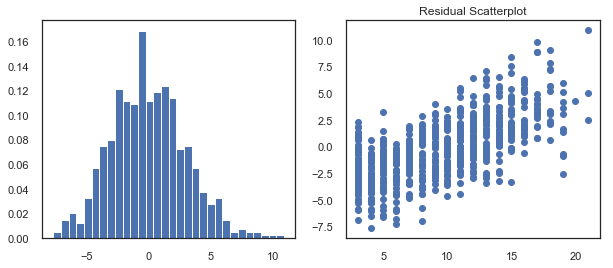

In [38]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()
    
checkresiduals(final_df, 'm_career_length', mlr_model)

/Users/hmnathel/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


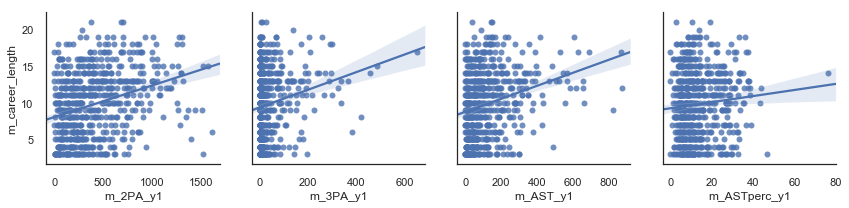

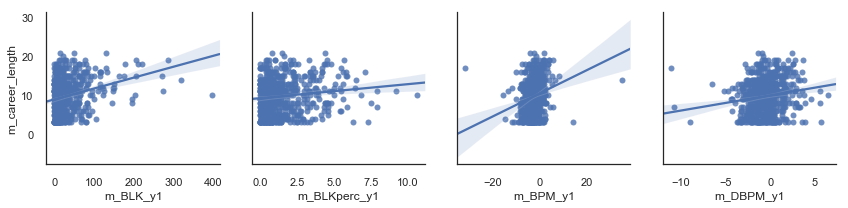

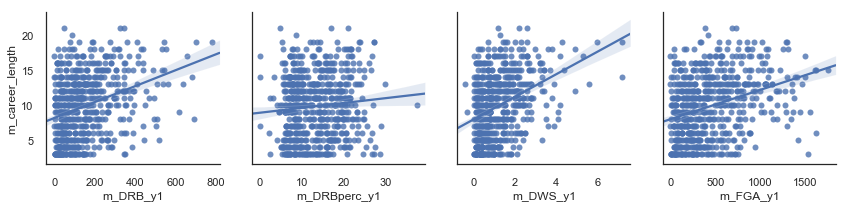

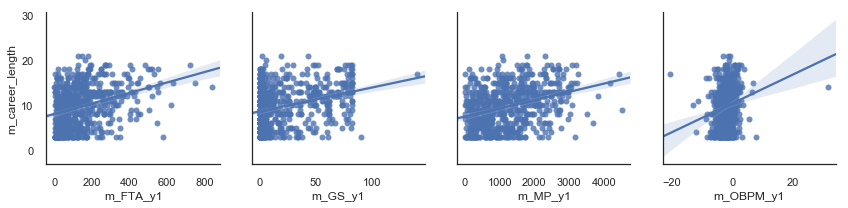

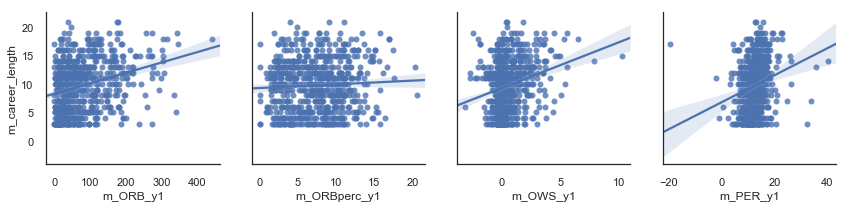

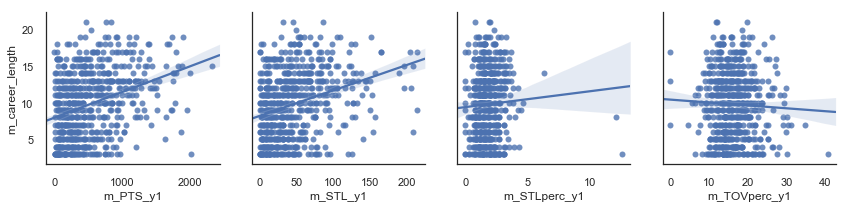

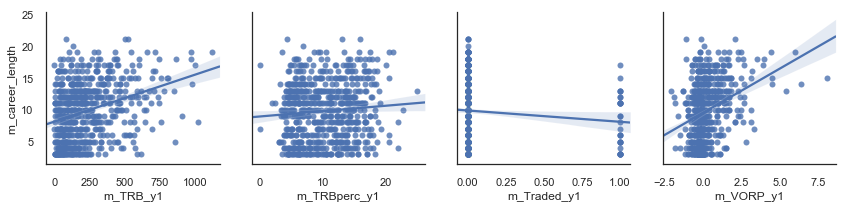

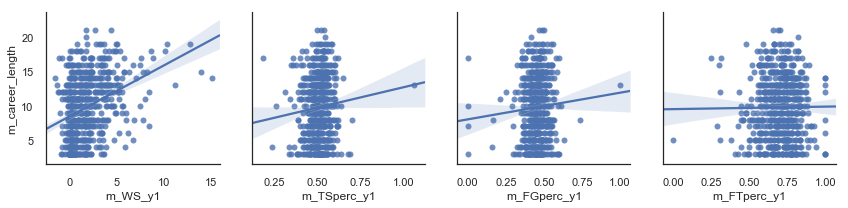

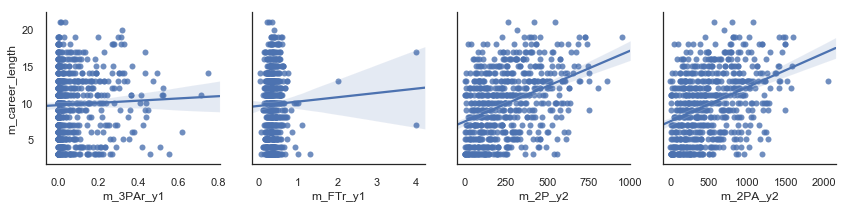

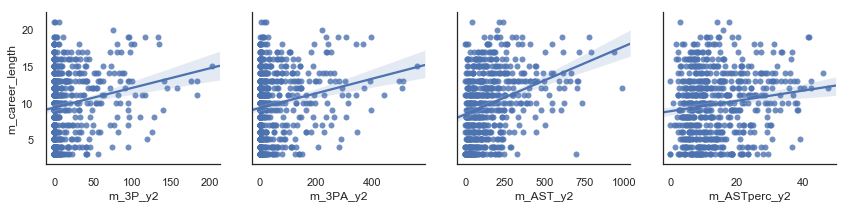

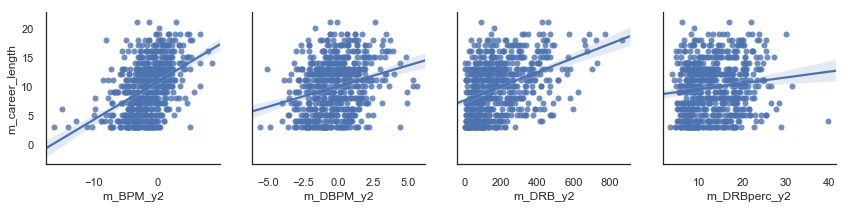

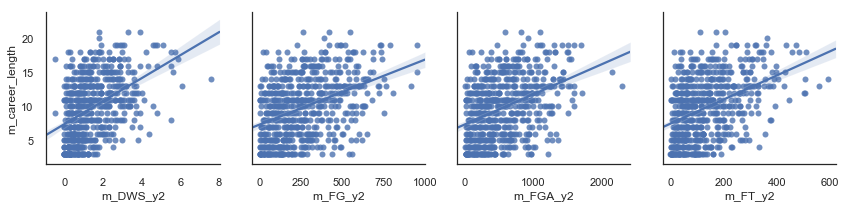

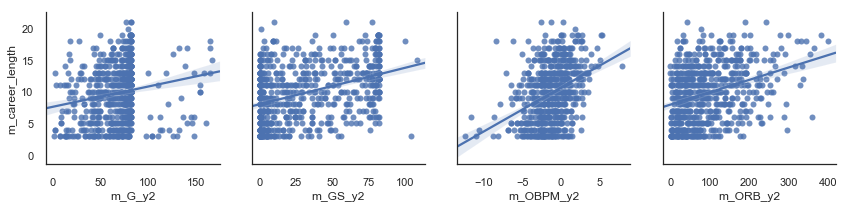

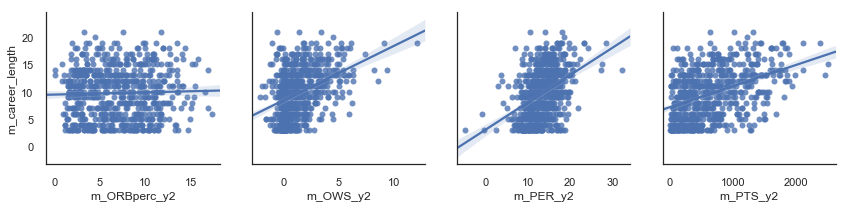

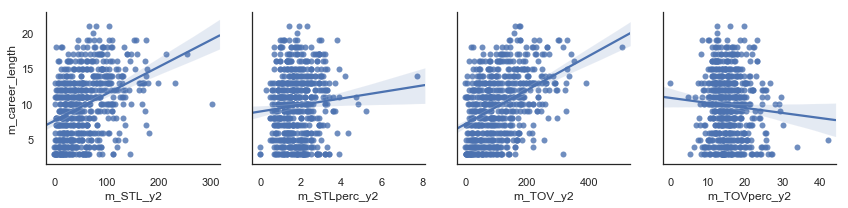

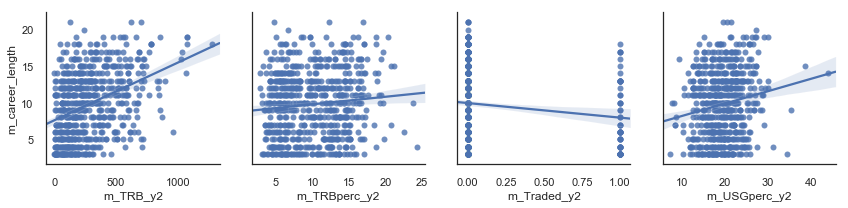

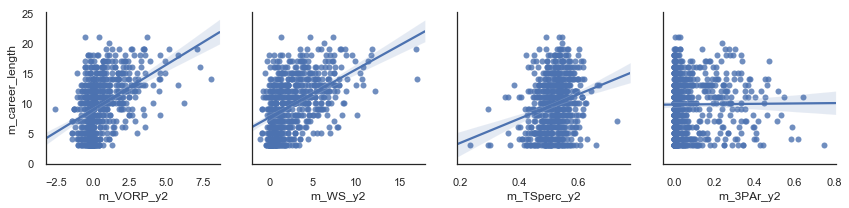

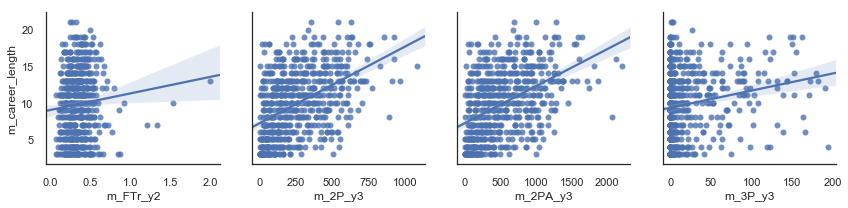

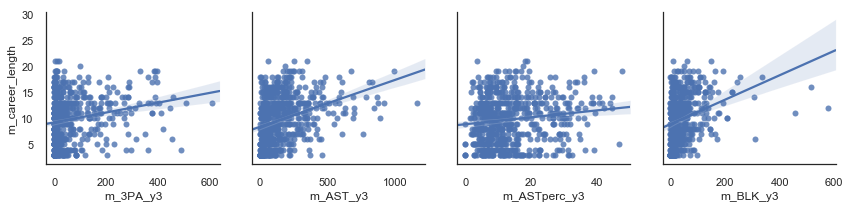

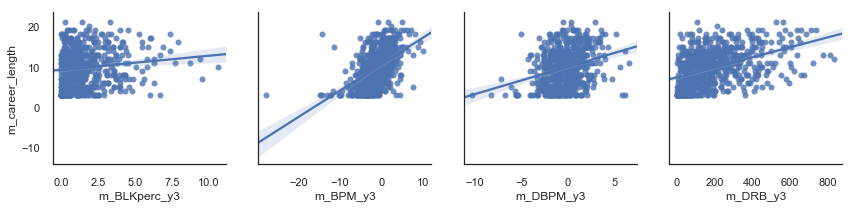

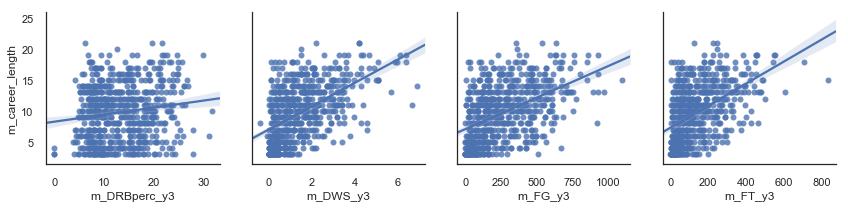

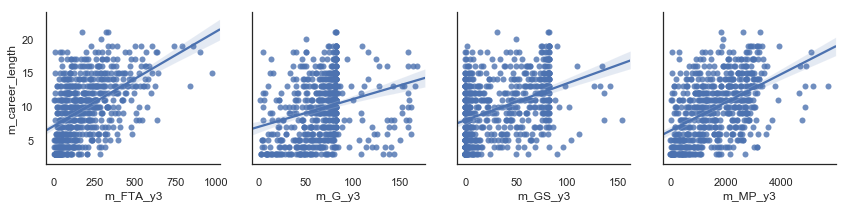

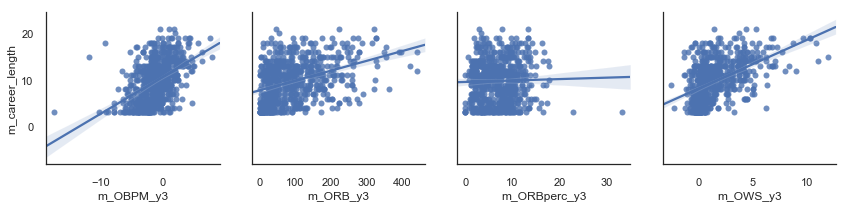

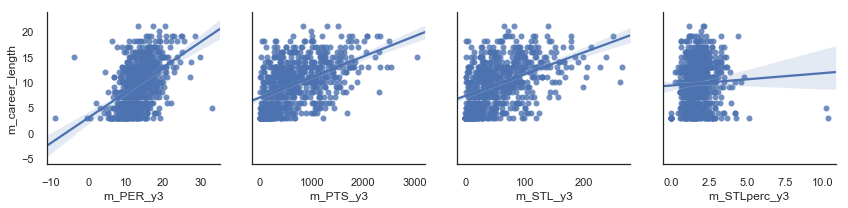

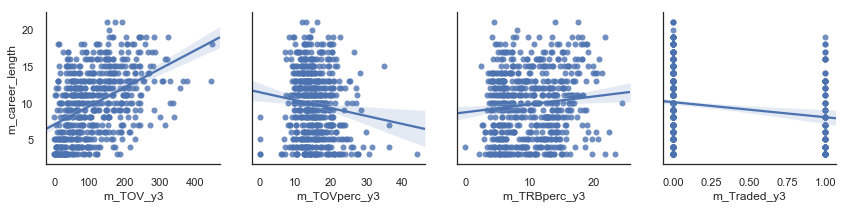

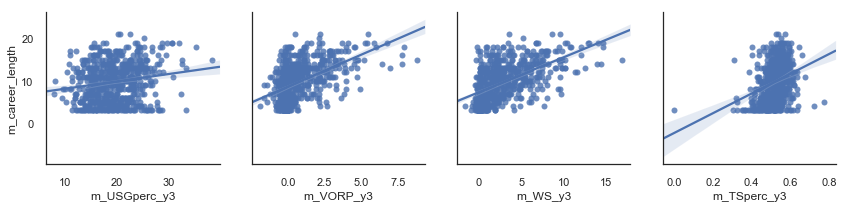

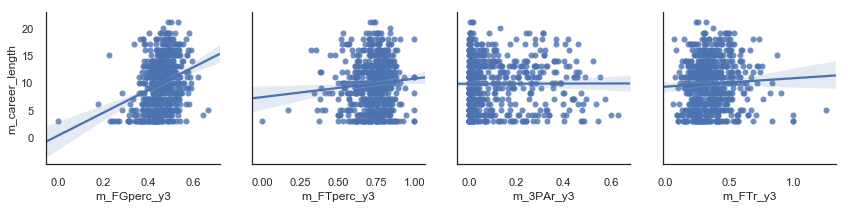

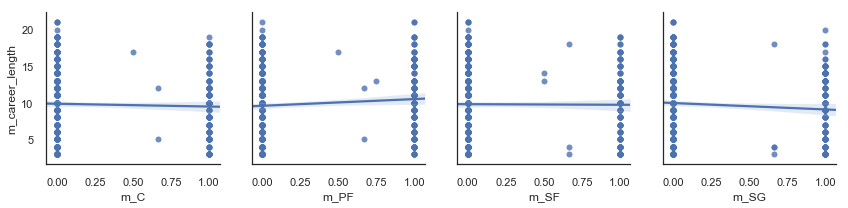

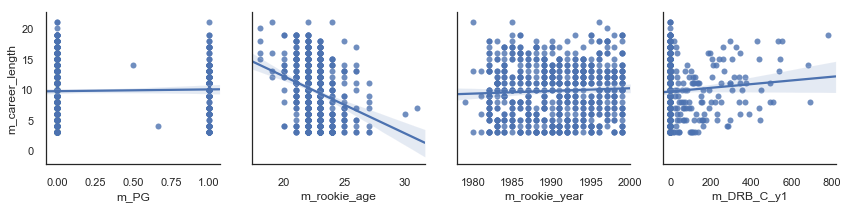

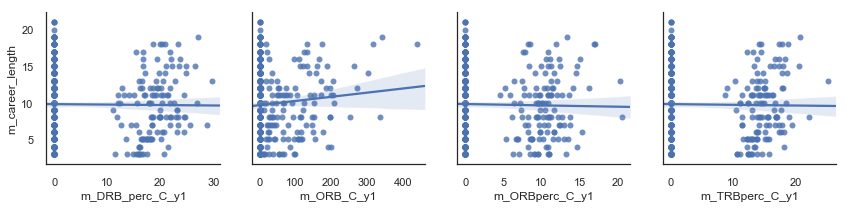

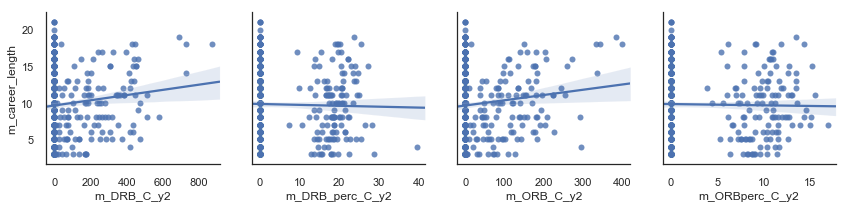

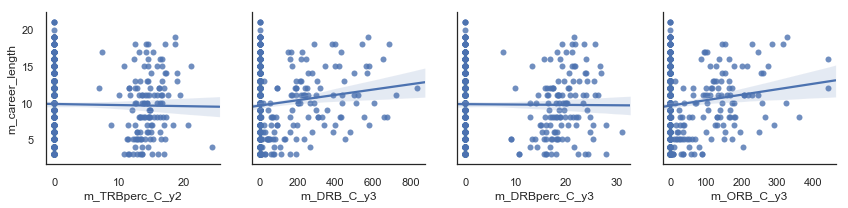

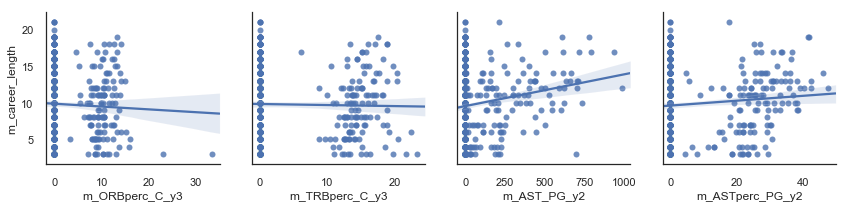

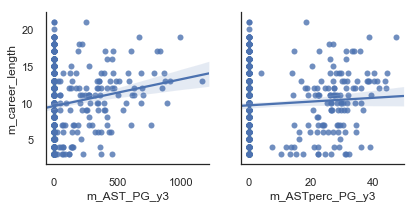

In [39]:
#break the columns in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

for i in row_groups:
    pp = sns.pairplot(data=final_df, y_vars=['m_career_length'],x_vars=i, kind="reg", height=3)





In [40]:
pd.set_option('display.max_rows', None)
kobe_nash_hardaway = pd.DataFrame(final_df.loc['Kobe Bryant'])

In [41]:
kobe_nash_hardaway

Kobe Bryant
m_2P_y1              125.000
m_2PA_y1             286.000
m_3P_y1               51.000
m_3PA_y1             136.000
m_AST_y1              91.000
m_ASTperc_y1          13.800
m_BLK_y1              23.000
m_BLKperc_y1           1.600
m_BPM_y1              -1.700
m_DBPM_y1             -0.800
m_DRB_y1              85.000
m_DRBperc_y1           8.700
m_DWS_y1               1.300
m_FG_y1              176.000
m_FGA_y1             422.000
m_FT_y1              136.000
m_FTA_y1             166.000
m_G_y1                71.000
m_GS_y1                6.000
m_MP_y1             1103.000
m_OBPM_y1             -0.900
m_ORB_y1              47.000
m_ORBperc_y1           4.900
m_OWS_y1               0.500
m_PER_y1              14.400
m_PTS_y1             539.000
m_STL_y1              49.000
m_STLperc_y1           2.300
m_TOV_y1             112.000
m_TOVperc_y1          18.500
m_TRB_y1             132.000
m_TRBperc_y1           6.800
m_Traded_y1            0.000
m_USGperc_y1          24.700
m_VORP_y1              0.100
m_WS_y1                1.800
m_TSperc_y1            0.544
m_FGperc_y1            0.417
m_FTperc_y1            0.819
m_3PAr_y1              0.322
m_FTr_y1               0.393
m_2P_y2              316.000
m_2PA_y2             693.000
m_3P_y2               75.000
m_3PA_y2             220.000
m_AST_y2             199.000
m_ASTperc_y2          16.000
m_BLK_y2              40.000
m_BLKperc_y2           1.300
m_BPM_y2               0.200
m_DBPM_y2             -1.700
m_DRB_y2             163.000
m_DRBperc_y2           8.700
m_DWS_y2               1.800
m_FG_y2              391.000
m_FGA_y2             913.000
m_FT_y2              363.000
m_FTA_y2             457.000
m_G_y2                79.000
m_GS_y2                1.000
m_MP_y2             2056.000
m_OBPM_y2              1.900
m_ORB_y2              79.000
m_ORBperc_y2           4.500
m_OWS_y2               4.500
m_PER_y2              18.500
m_PTS_y2            1220.000
m_STL_y2              74.000
m_STLperc_y2           1.800
m_TOV_y2             157.000
m_TOVperc_y2          12.400
m_TRB_y2             242.000
m_TRBperc_y2           6.700
m_Traded_y2            0.000
m_USGperc_y2          27.200
m_VORP_y2              1.100
m_WS_y2                6.300
m_TSperc_y2            0.548
m_FGperc_y2            0.428
m_FTperc_y2            0.794
m_3PAr_y2              0.241
m_FTr_y2               0.501
m_2P_y3              335.000
m_2PA_y3             678.000
m_3P_y3               27.000
m_3PA_y3             101.000
m_AST_y3             190.000
m_ASTperc_y3          17.500
m_BLK_y3              50.000
m_BLKperc_y3           1.900
m_BPM_y3               2.300
m_DBPM_y3              0.300
m_DRB_y3             211.000
m_DRBperc_y3          12.700
m_DWS_y3               1.500
m_FG_y3              362.000
m_FGA_y3             779.000
m_FT_y3              245.000
m_FTA_y3             292.000
m_G_y3                50.000
m_GS_y3               50.000
m_MP_y3             1896.000
m_OBPM_y3              2.000
m_ORB_y3              53.000
m_ORBperc_y3           3.300
m_OWS_y3               3.700
m_PER_y3              18.900
m_PTS_y3             996.000
m_STL_y3              72.000
m_STLperc_y3           2.000
m_TOV_y3             157.000
m_TOVperc_y3          14.700
m_TRB_y3             264.000
m_TRBperc_y3           8.100
m_Traded_y3            0.000
m_USGperc_y3          25.300
m_VORP_y3              2.100
m_WS_y3                5.200
m_TSperc_y3            0.549
m_FGperc_y3            0.465
m_FTperc_y3            0.839
m_3PAr_y3              0.130
m_FTr_y3               0.375
m_C                    0.000
m_PF                   0.000
m_SF                   0.000
m_SG                   1.000
m_PG                   0.000
m_career_length       20.000
m_rookie_age          18.000
m_rookie_year       1997.000
m_DRB_C_y1             0.000
m_DRB_perc_C_y1        0.000
m_ORB_C_y1             0.000
m_ORBperc_C_y1         0.000
m_TRB_C_y1             0.000
m_TRBperc_C_y1         0.000
m_DRB_C_y2     

In [64]:
centers = final_df['m_C']
sum(centers)

125.83333333333333

In [65]:
powerforwards = final_df['m_PF']
sum(powerforwards)

145.58333333333331

In [66]:
smallforwards = final_df['m_SF']
sum(smallforwards)

125.0

In [67]:
shootingguards = final_df['m_SG']
sum(shootingguards)

128.66666666666669

In [68]:
pointguards = final_df['m_PG']
sum(pointguards)

130.16666666666666